In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows',1460,'display.max_columns',81)

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe(include='all').T

count unique      top  freq          mean           std  \
Id             1460.0    NaN      NaN   NaN         730.5    421.610009   
MSSubClass     1460.0    NaN      NaN   NaN      56.89726     42.300571   
MSZoning         1460      5       RL  1151           NaN           NaN   
LotFrontage    1201.0    NaN      NaN   NaN     70.049958     24.284752   
LotArea        1460.0    NaN      NaN   NaN  10516.828082   9981.264932   
Street           1460      2     Pave  1454           NaN           NaN   
Alley              91      2     Grvl    50           NaN           NaN   
LotShape         1460      4      Reg   925           NaN           NaN   
LandContour      1460      4      Lvl  1311           NaN           NaN   
Utilities        1460      2   AllPub  1459           NaN           NaN   
LotConfig        1460      5   Inside  1052           NaN           NaN   
LandSlope        1460      3      Gtl  1382           NaN           NaN   
Neighborhood     1460     25    NAmes   225           NaN           NaN   
Condition1       1460      9     Norm  1260           NaN           NaN   
Condition2       1460      8     Norm  1445           NaN           NaN   
BldgType         1460      5     1Fam  1220           NaN           NaN   
HouseStyle       1460      8   1Story   726           NaN           NaN   
OverallQual    1460.0    NaN      NaN   NaN      6.099315      1.382997   
OverallCond    1460.0    NaN      NaN   NaN      5.575342      1.112799   
YearBuilt      1460.0    NaN      NaN   NaN   1971.267808     30.202904   
YearRemodAdd   1460.0    NaN      NaN   NaN   1984.865753     20.645407   
RoofStyle        1460      6    Gable  1141           NaN           NaN   
RoofMatl         1460      8  CompShg  1434           NaN           NaN   
Exterior1st      1460     15  VinylSd   515           NaN           NaN   
Exterior2nd      1460     16  VinylSd   504           NaN           NaN   
MasVnrType        588      3  BrkFace   445           NaN           NaN   
MasVnrArea     1452.0    NaN      NaN   NaN    103.685262    181.066207   
ExterQual        1460      4       TA   906           NaN           NaN   
ExterCond        1460      5       TA  1282           NaN           NaN   
Foundation       1460      6    PConc   647           NaN           NaN   
BsmtQual         1423      4       TA   649           NaN           NaN   
BsmtCond         1423      4       TA  1311           NaN           NaN   
BsmtExposure     1422      4       No   953           NaN           NaN   
BsmtFinType1     1423      6      Unf   430           NaN           NaN   
BsmtFinSF1     1460.0    NaN      NaN   NaN    443.639726    456.098091   
BsmtFinType2     1422      6      Unf  1256           NaN           NaN   
BsmtFinSF2     1460.0    NaN      NaN   NaN     46.549315    161.319273   
BsmtUnfSF      1460.0    NaN      NaN   NaN    567.240411    441.866955   
TotalBsmtSF    1460.0    NaN      NaN   NaN   1057.429452    438.705324   
Heating          1460      6     GasA  1428           NaN           NaN   
HeatingQC        1460      5       Ex   741           NaN           NaN   
CentralAir       1460      2        Y  1365           NaN           NaN   
Electrical       1459      5    SBrkr  1334           NaN           NaN   
1stFlrSF       1460.0    NaN      NaN   NaN   1162.626712    386.587738   
2ndFlrSF       1460.0    NaN      NaN   NaN    346.992466    436.528436   
LowQualFinSF   1460.0    NaN      NaN   NaN      5.844521     48.623081   
GrLivArea      1460.0    NaN      NaN   NaN   1515.463699    525.480383   
BsmtFullBath   1460.0    NaN      NaN   NaN      0.425342      0.518911   
BsmtHalfBath   1460.0    NaN      NaN   NaN      0.057534      0.238753   
FullBath       1460.0    NaN      NaN   NaN      1.565068      0.550916   
HalfBath       1460.0    NaN      NaN   NaN      0.382877      0.502885   
BedroomAbvGr   1460.0    NaN      NaN   NaN      2.866438      0.815778   
KitchenAbvGr   1460.0    NaN      NaN   N

In [7]:
df.isnull().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
# Separating the categorical and numerical columns in dataframe
numeric_df = df.select_dtypes(include=['int64','Float64'])
categorical_df = df.select_dtypes(include=['object'])

In [9]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Data Pre-Processing

In [11]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

In [12]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value

In [13]:
df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517   
std       0.963696    30.108397     20.645407   134.925253   433.219435   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000   

       BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count      1460.0  1460.000000  1460.000000  1460.000000  1460.000000   
mean          0.0   563.777740  1050.254795  1157.018151   346.789041   
std           0.0   431.710214   397.937878   362.583002   435.791621   
min           0.0     0.000000    42.000000   334.000000     0.000000   
25%           0.0   223.000000   795.750000   882.000000     0.000000   
50%           0.0   477.500000   991.500000  1087.000000     0.000000   
75%           0.0   808.000000  1298.250000  1391.250000   728.000000   
max           0.0  1685.500000  2052.000000  2155.125000  1820.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count        1460.0  1460.000000   1460.000000        1460.0  1460.000000   
mean            0.0  1503.735873      0.425000           0.0     1.565068   
std             0.0   481.375641      0.517373           0.0     0.550916   
min             0.0   334.000000      0.000000           0.0     0.000000   
25%             0.0  1129.500000      0.000000           0.0     1.000000   
50%             0.0  1464.000000      0.000000           0.0     2.000000   
75%             0.0  1776.750000      1.000000           0.0     2.000000   
max             0.0  2747.625000      2.500000           0.0     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000        1460.0   1460.000000  1460.000000   
mean      0.382877      2.851712           1.0      6.487671     0.611301   
std       0.502885      0.759516           0.0      1.541916     0.638959   
min       0.000000      0.500000           1.0      2.000000     0.000000   
25%       0.000000      2.000000           1.0      5.000000     0.000000   
50%       0.000000      3.000000           1.0      6.000000     1.000000   
75%       1.000000      3.000000           1.0      7.000000     1.000000   
max       2.000000      4.500000           1.0     10.000000     2.500000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.765411   470.670719    91.806849    42.603425   
std      24.689725     0.742753   207.105729   116.658120    52.501584   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2010.000000     3.5

#### Correlation In numerical Data

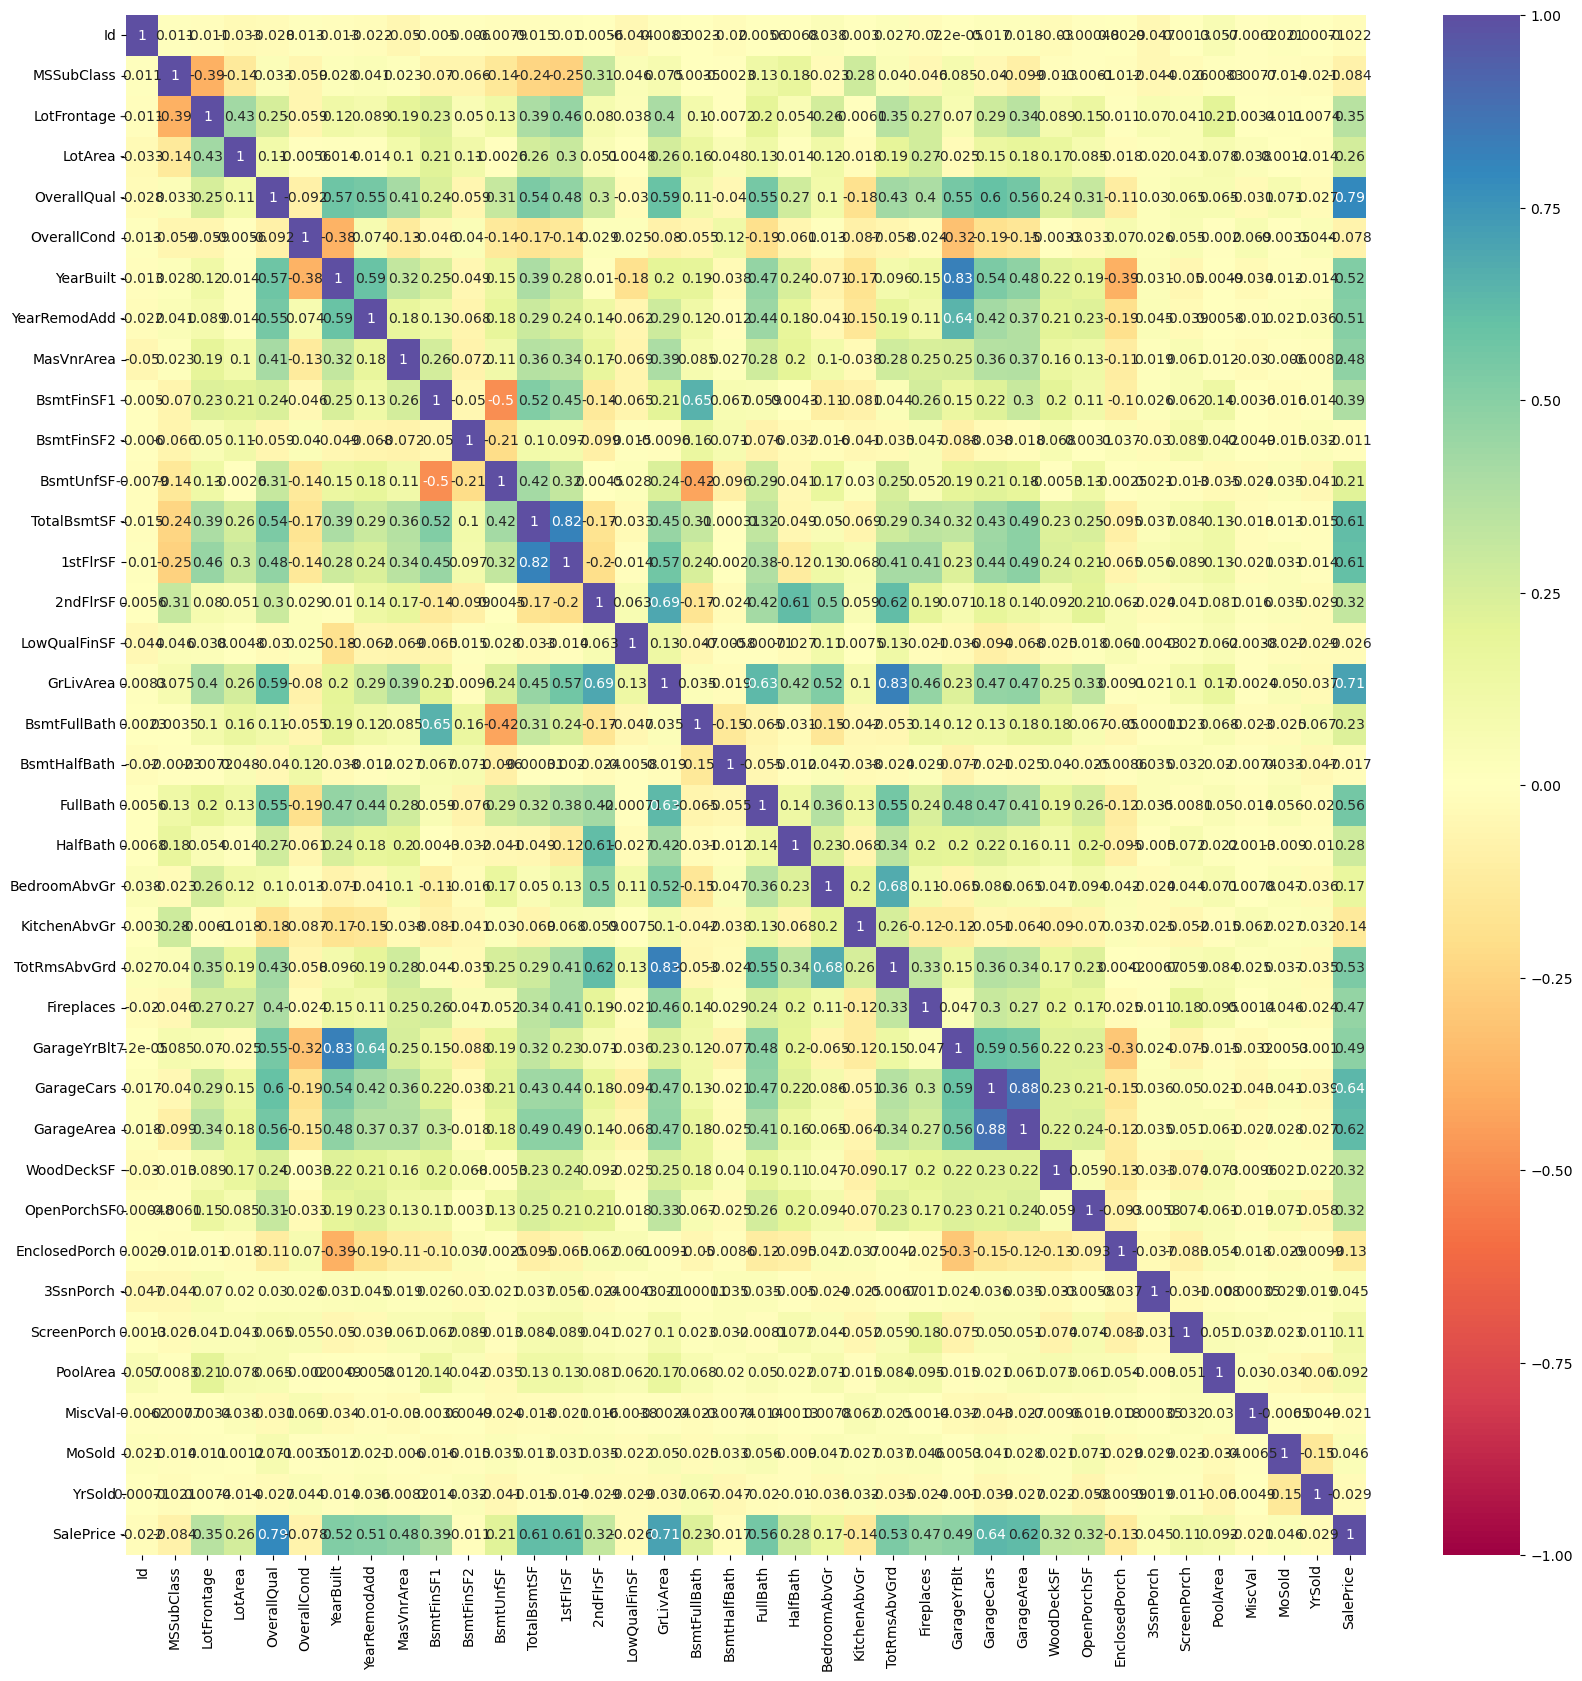

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric_df.corr(),annot=True,cmap='Spectral',vmax=1,vmin=-1)
plt.show()

### Univariate Analysis and Bivariate Analysis

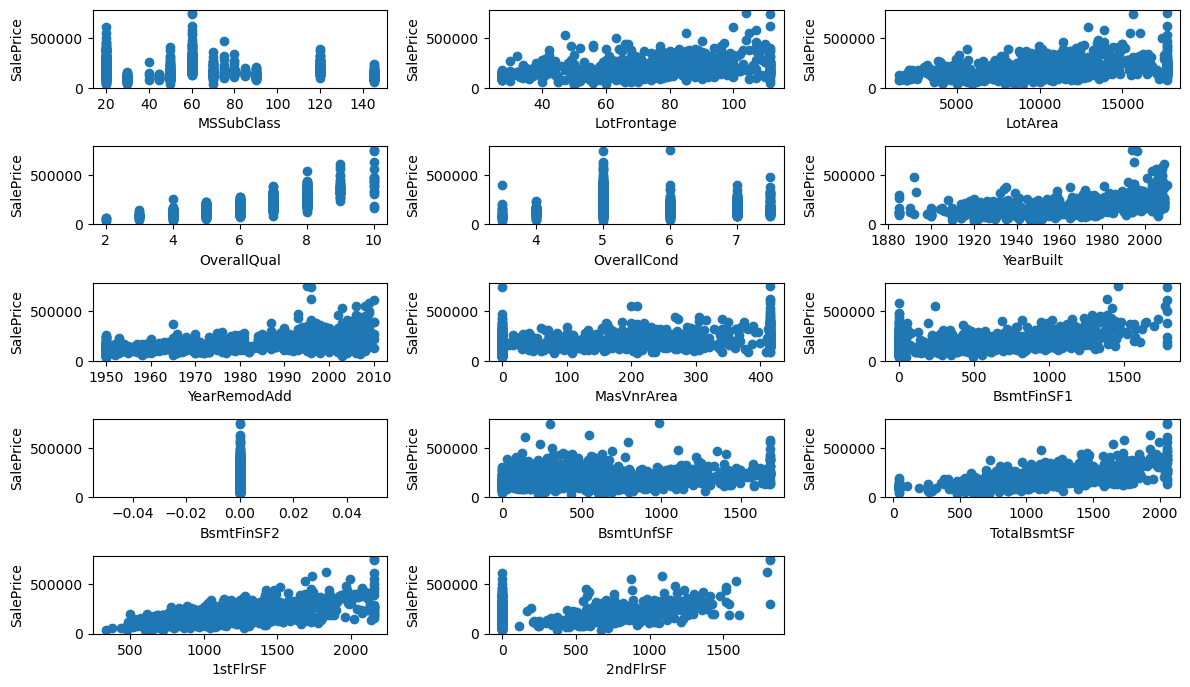

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate (['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    plt.scatter(df[feature], df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()

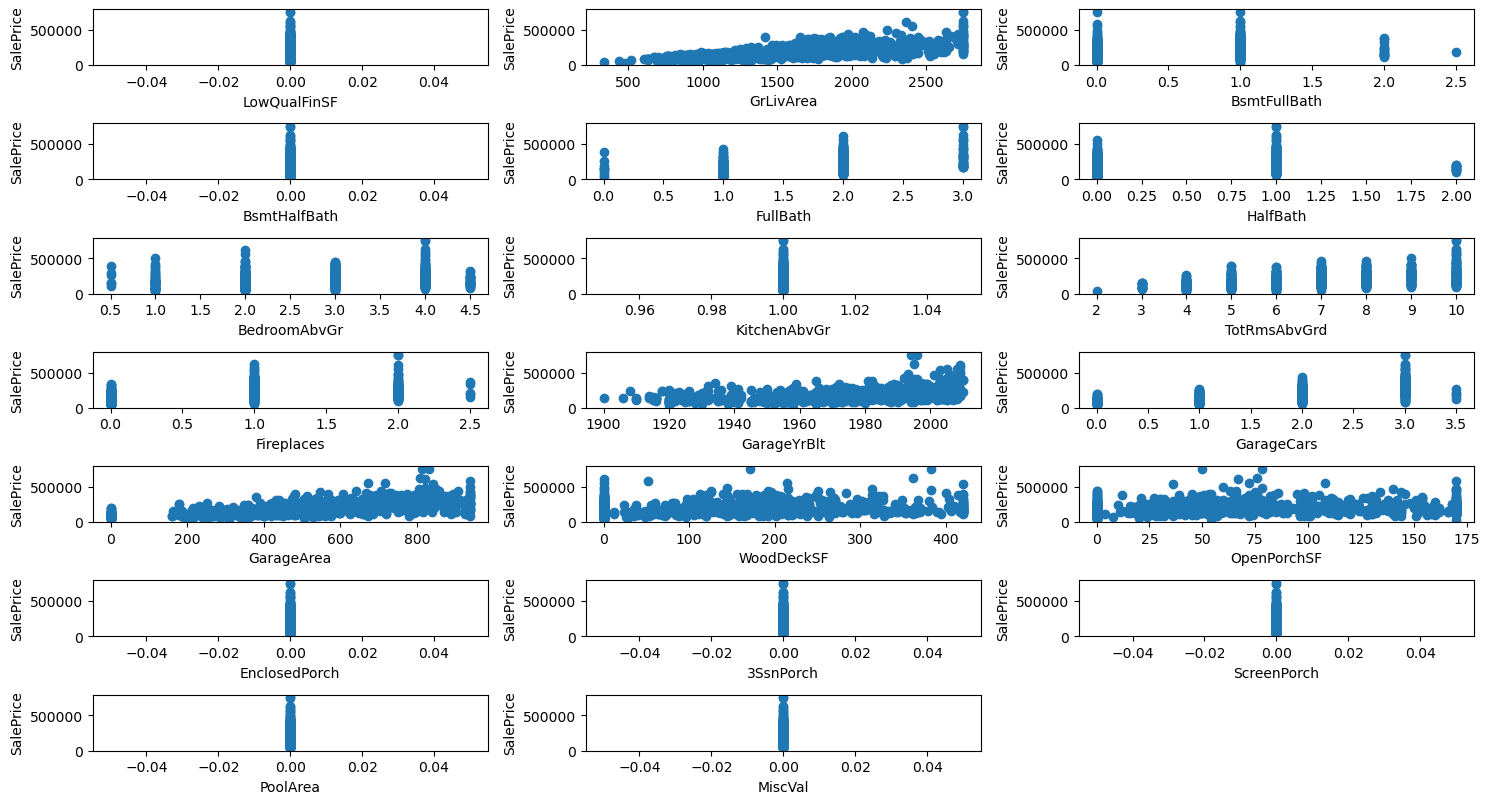

In [16]:
plt.figure(figsize=(15,10))

for i,features in enumerate (['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    plt.scatter(df[features], df['SalePrice'])
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    
    

#### Visualization of distribution of variables

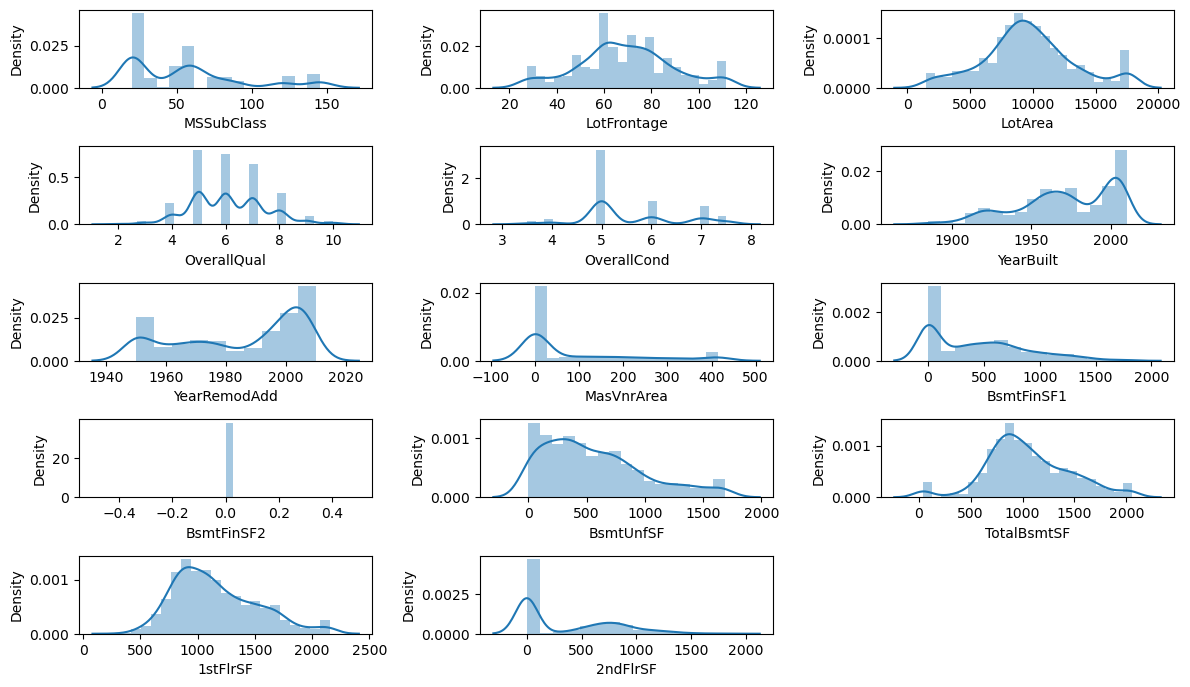

In [17]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate (['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.tight_layout()

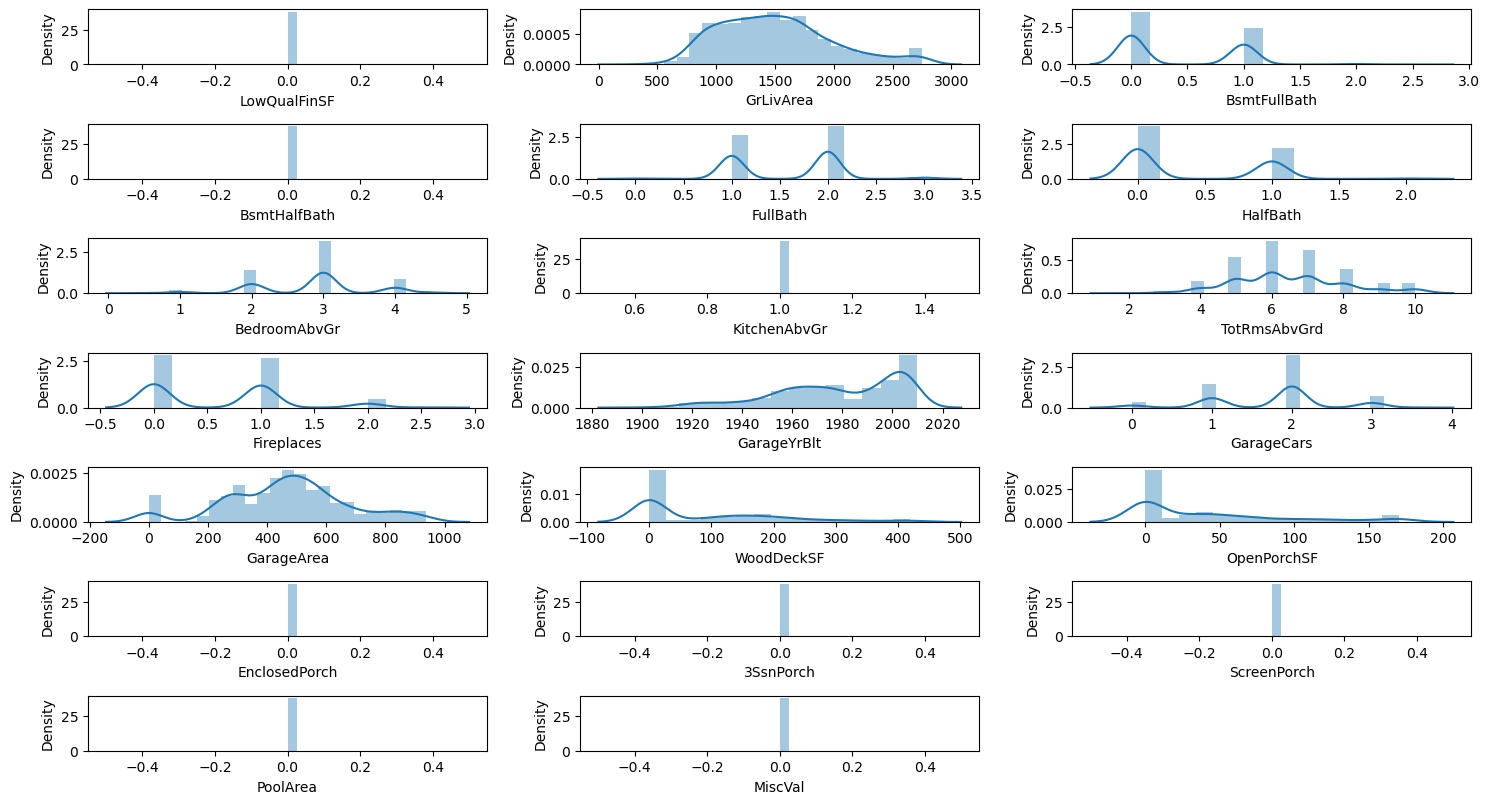

In [18]:
plt.figure(figsize=(15,10))

for i,features in enumerate (['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[features])
    plt.xlabel(features)
    plt.tight_layout()

In [19]:
df[['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']].describe(include='all').T

count         mean         std     min     25%     50%  \
LowQualFinSF   1460.0     0.000000    0.000000     0.0     0.0     0.0   
GrLivArea      1460.0  1503.735873  481.375641   334.0  1129.5  1464.0   
BsmtFullBath   1460.0     0.425000    0.517373     0.0     0.0     0.0   
BsmtHalfBath   1460.0     0.000000    0.000000     0.0     0.0     0.0   
FullBath       1460.0     1.565068    0.550916     0.0     1.0     2.0   
HalfBath       1460.0     0.382877    0.502885     0.0     0.0     0.0   
BedroomAbvGr   1460.0     2.851712    0.759516     0.5     2.0     3.0   
KitchenAbvGr   1460.0     1.000000    0.000000     1.0     1.0     1.0   
TotRmsAbvGrd   1460.0     6.487671    1.541916     2.0     5.0     6.0   
Fireplaces     1460.0     0.611301    0.638959     0.0     0.0     1.0   
GarageYrBlt    1379.0  1978.506164   24.689725  1900.0  1961.0  1980.0   
GarageCars     1460.0     1.765411    0.742753     0.0     1.0     2.0   
GarageArea     1460.0   470.670719  207.105729     0.0   334.5   480.0   
WoodDeckSF     1460.0    91.806849  116.658120     0.0     0.0     0.0   
OpenPorchSF    1460.0    42.603425   52.501584     0.0     0.0    25.0   
EnclosedPorch  1460.0     0.000000    0.000000     0.0     0.0     0.0   
3SsnPorch      1460.0     0.000000    0.000000     0.0     0.0     0.0   
ScreenPorch    1460.0     0.000000    0.000000     0.0     0.0     0.0   
PoolArea       1460.0     0.000000    0.000000     0.0     0.0     0.0   
MiscVal        1460.0     0.000000    0.000000     0.0     0.0     0.0   

                   75%       max  
LowQualFinSF      0.00     0.000  
GrLivArea      1776.75  2747.625  
BsmtFullBath      1.00     2.500  
BsmtHalfBath      0.00     0.000  
FullBath          2.00     3.000  
HalfBath          1.00     2.000  
BedroomAbvGr      3.00     4.500  
KitchenAbvGr      1.00     1.000  
TotRmsAbvGrd      7.00    10.000  
Fireplaces        1.00     2.500  
GarageYrBlt    2002.00  2010.000  
GarageCars        2.00     3.500  
GarageArea      576.00   938.250  
WoodDeckSF      168.00   420.000  
OpenPorchSF      68.00   170.000  
EnclosedPorch     0.00     0.000  
3SsnPorch         0.00     0.000  
ScreenPorch       0.00     0.000  
PoolArea          0.00     0.000  
MiscVal           0.00     0.000

In [20]:
df[['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF','BsmtHalfBath']].describe(include='all').T

count  mean  std  min  25%  50%  75%  max
EnclosedPorch  1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3SsnPorch      1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ScreenPorch    1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
PoolArea       1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
MiscVal        1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
LowQualFinSF   1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
BsmtHalfBath   1460.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [21]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','LowQualFinSF','BsmtHalfBath'],axis=1,inplace=True)

#### Applying numerical features in descrete values

In [22]:
df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  FullBath  \
0               7          5.0       2    2008           1.0         2   
1               6          7.5       5    2007           0.0         2   
2               7          5.0       9    2008           1.0         2   
3               7          5.0       2    2006           1.0         1   
4               8          5.0      12    2008           1.0         2   
5               5          5.0      10    2009           1.0         1   
6               8          5.0       8    2007           1.0         2   
7               7          6.0      11    2009           1.0         2   
8               7          5.0       4    2008           0.0         2   
9               5          6.0       1    2008           1.0         1   
10              5          5.0       2    2008           1.0         1   
11              9          5.0       7    2006           1.0         3   
12              5          6.0       9    2008           1.0         1   
13              7          5.0       8    2007           0.0         2   
14              6          5.0       5    2008           1.0         1   
15              7          7.5       7    2007           0.0         1   
16              6          7.0       3    2010           1.0         1   
17              4          5.0      10    2006           0.0         2   
18              5          5.0       6    2008           1.0         1   
19              5          6.0       5    2009           0.0         1   
20              8          5.0      11    2006           0.0         3   
21              7          7.0       6    2007           0.0         1   
22              8          5.0       9    2008           0.0         2   
23              5          7.0       6    2007           1.0         1   
24              5          7.5       5    2010           1.0         1   
25              8          5.0       7    2009           0.0         2   
26              5          7.0       5    2010           0.0         1   
27              8          5.0       5    2010           1.0         2   
28              5          6.0      12    2006           1.0         1   
29              4          6.0       5    2008           0.0         1   
30              4          4.0       7    2008           0.0         1   
31              5          6.0       6    2008           0.0         1   
32              8          5.0       1    2008           0.0         2   
33              5          5.0       4    2010           0.0         1   
34              9          5.0       8    2007           1.0         2   
35              8          5.0       9    2006           0.0         3   
36              5          5.0       6    2009           0.0         1   
37              5          6.0      10    2009           0.0         1   
38              5          7.0       1    2010           1.0         1   
39              4          5.0       6    2008           0.0         2   
40              6          5.0      12    2006           0.0         2   
41              5          6.0       7    2007           0.0         1   
42              5          7.0      12    2007           1.0         1   
43              5          6.0       7    2008           1.0         1   
44              5          6.0       5    2006           1.0         1   
45              9          5.0       2    2010           1.0         2   
46              7          5.0       8    2009           1.0         1   
47              8          5.0       7    2007           0.0         2   
48              4          5.0       6    2009           0.0         2   
49              5          7.0       1    2007           1.0         1   
50              6          6.0       7    2007           0.0         2   
51              6          6.0       9    2006           0.0         1   
52              5          5.0       5    2010           1.0         1   
53        

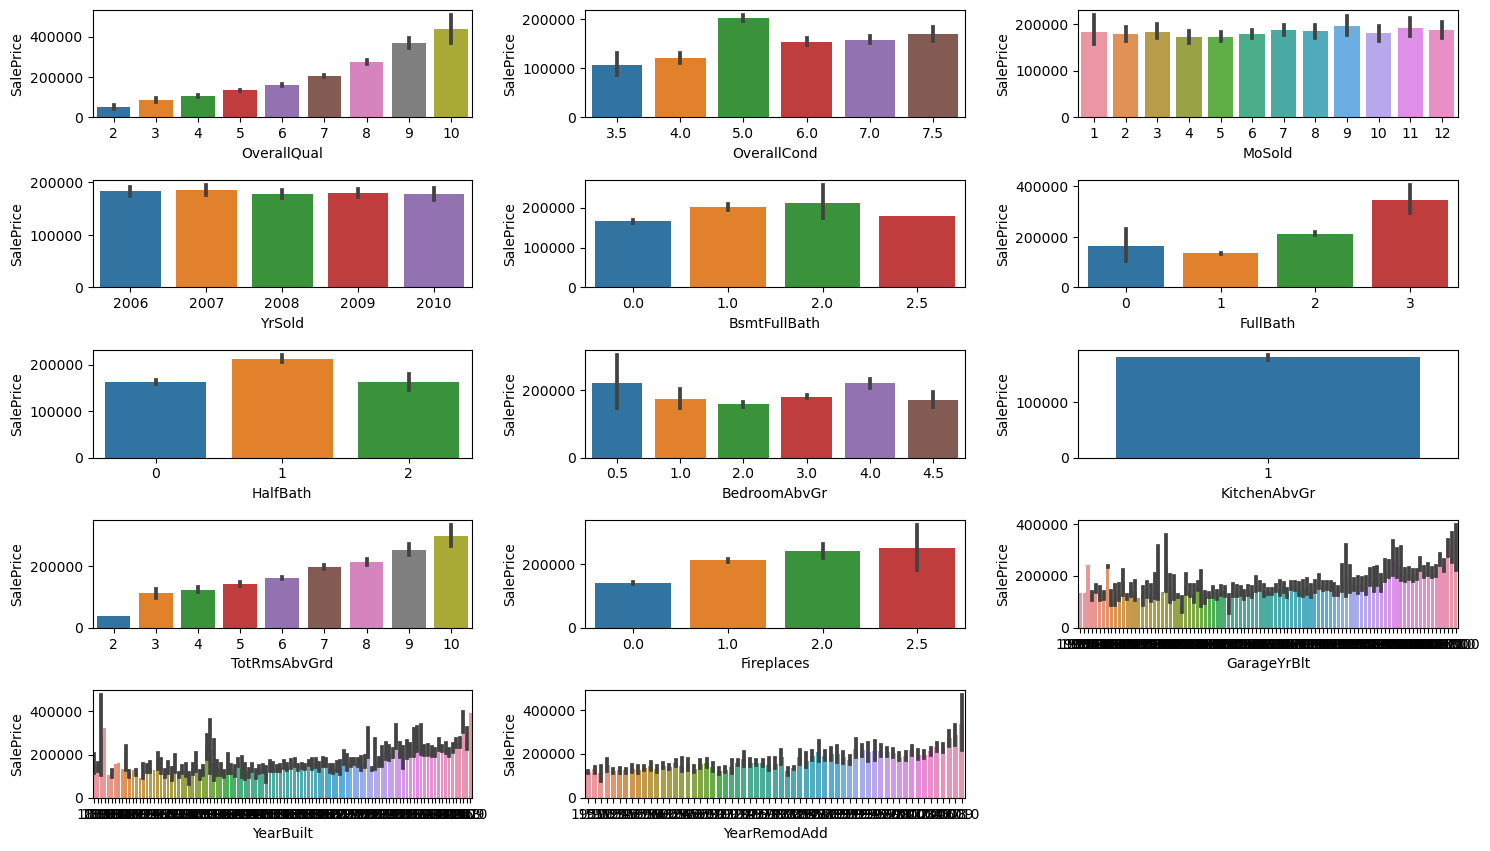

In [23]:
plt.figure(figsize=(15,15))

for i,features in enumerate (['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.barplot(x=df[features],y=df['SalePrice'])
    plt.xlabel(features)
    plt.tight_layout()

In [24]:
df[['KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd','FullBath']].describe()

KitchenAbvGr  GarageYrBlt    YearBuilt  YearRemodAdd     FullBath
count        1460.0  1379.000000  1460.000000   1460.000000  1460.000000
mean            1.0  1978.506164  1971.299315   1984.865753     1.565068
std             0.0    24.689725    30.108397     20.645407     0.550916
min             1.0  1900.000000  1885.000000   1950.000000     0.000000
25%             1.0  1961.000000  1954.000000   1967.000000     1.000000
50%             1.0  1980.000000  1973.000000   1994.000000     2.000000
75%             1.0  2002.000000  2000.000000   2004.000000     2.000000
max             1.0  2010.000000  2010.000000   2010.000000     3.000000

In [25]:
df[['KitchenAbvGr','FullBath']].value_counts()

KitchenAbvGr  FullBath
1             2           768
              1           650
              3            33
              0             9
Name: count, dtype: int64

In [26]:
df.drop('KitchenAbvGr',axis=1,inplace=True)

#### Converting years related features into no. of years

In [27]:
for features in [['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]:
    df[features] = 2024-df[features]

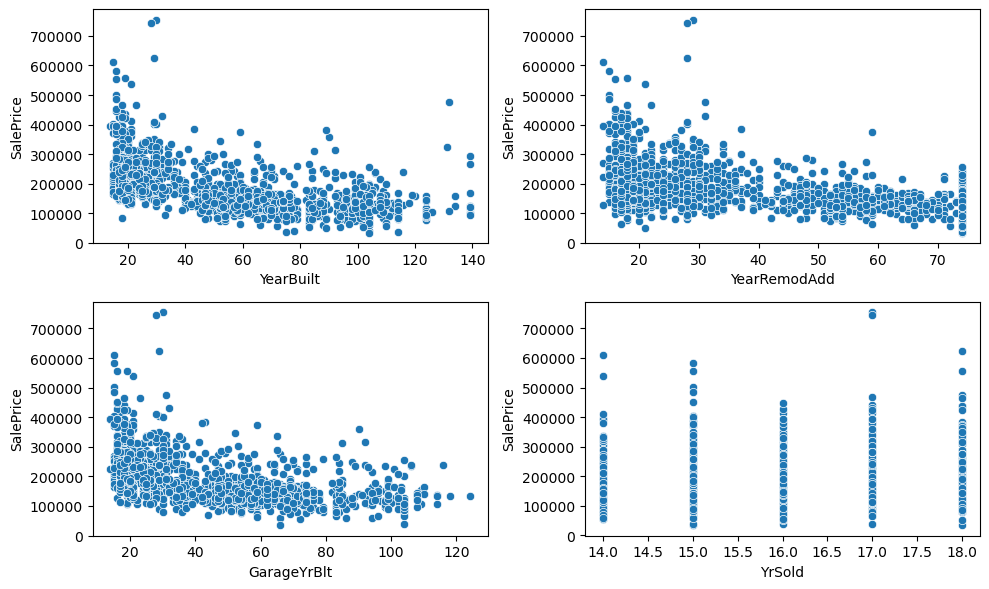

In [28]:
plt.figure(figsize=(10,6))

for i,Features in enumerate (['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(x=df[Features],y=df['SalePrice'])
    plt.xlabel(Features)
    plt.tight_layout()
    
    
    

#### Missing Value Handling-Numerical Featurs

In [29]:
for features in df.select_dtypes(exclude=['object']).columns:
    if df[features].isnull().any():
        print(features,':',round(df[features].isnull().sum()/df[features].shape[0],2)*100)
    

LotFrontage : 18.0
MasVnrArea : 1.0
GarageYrBlt : 6.0


In [30]:

df = df[~df['MasVnrArea'].isnull()]
df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [31]:
df.columns.shape

(72,)

# Comment:

#### GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
#### GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
#### TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
#### TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
#### Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [32]:
df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(df.columns.shape)

(68,)


# Missing Value Handling:- Categorical Values

In [33]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
print(categorical_df.columns.shape[0])

43


In [35]:
for features in categorical_df.columns:
    if df[features].isnull().any():
        print(features,":",round(df[features].isnull().sum()/df[features].shape[0],2)*100)

Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [36]:
df['Electrical'].isnull().sum()

1

In [37]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [38]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature','MasVnrType']
print(df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
MasVnrType       864
dtype: int64


##### All these features which have missing values fill with "Not applicable"

In [39]:
# filling missing values
df[mv_categorical_features] = df[mv_categorical_features].fillna(value="Not_applicable",axis=1)

#checking after imputation of filling values
df[mv_categorical_features].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
MasVnrType      0
dtype: int64

In [40]:
# drooping PoolQC having hight no. of missing values
df.drop('PoolQC',axis=1,inplace=True)

In [41]:
df.dropna(subset=['Electrical'],inplace=True)

In [42]:
for features in df.columns:
    if df[features].isnull().any():
        print(features,":",round(df[features].isnull().sum()/df[features].shape[0],2)*100)

LotFrontage : 18.0


In [43]:
df.columns.shape[0]

67

###### Encoding For Categorical Variables Ordered Features -- to be label encoded 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

###### Unordered Features -- to be one hot encoded 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [44]:
ordered_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']

In [45]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

In [46]:
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(y=df['SalePrice'],x=df[feature])
        plt.tight_layout()

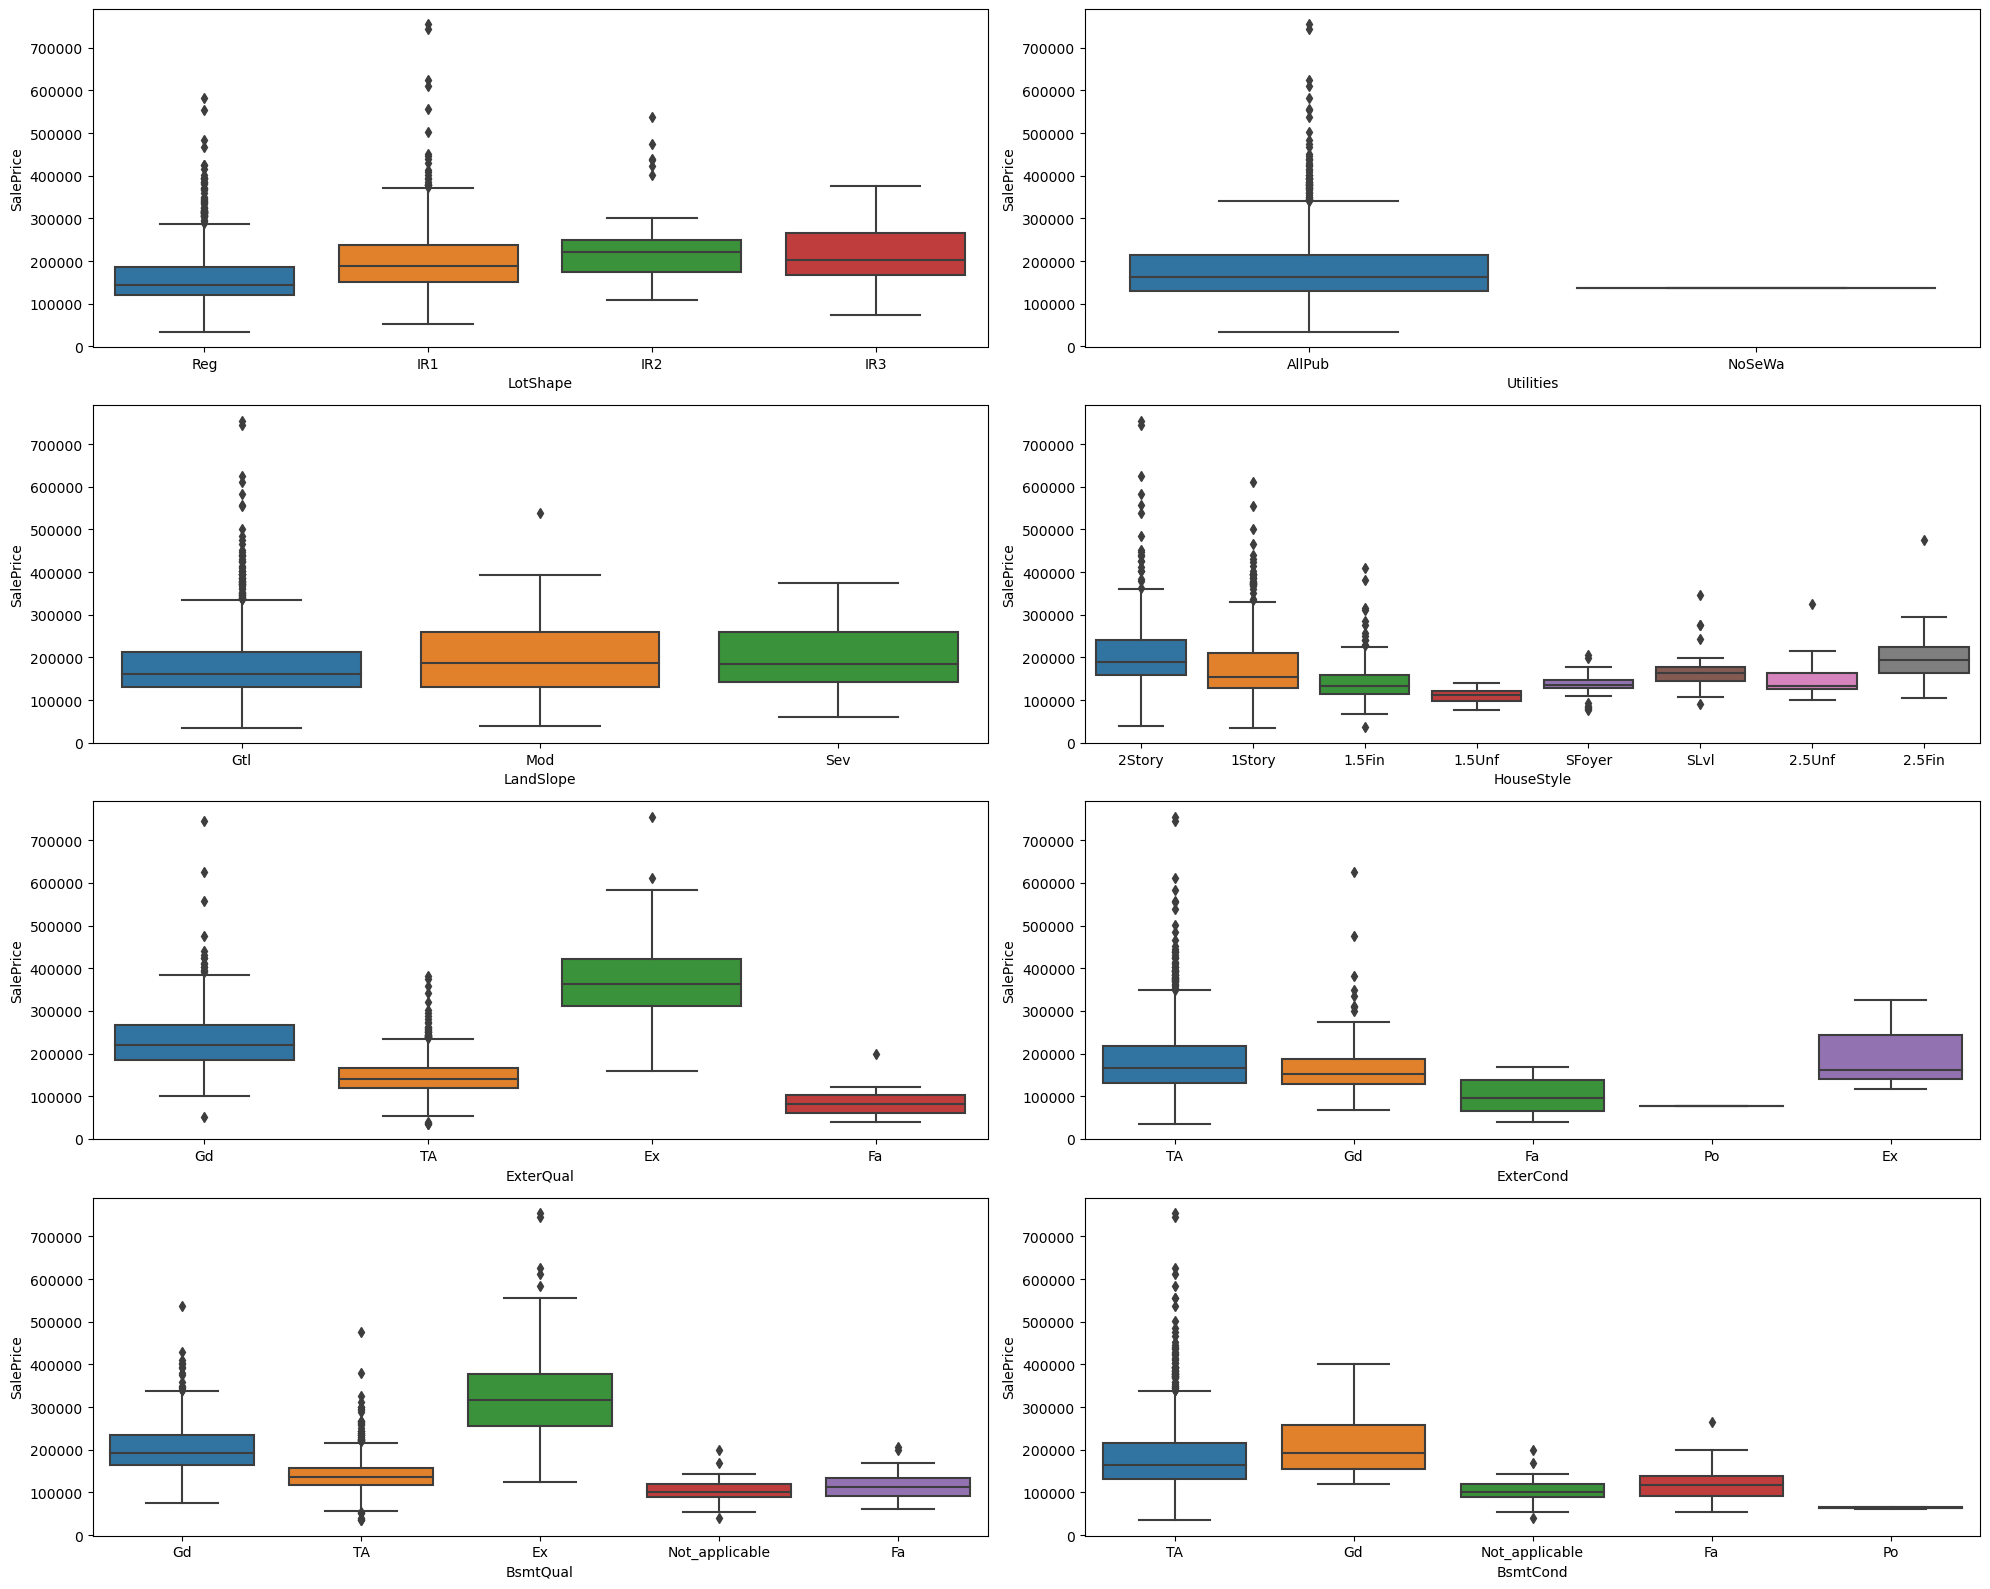

In [47]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond']
generate_boxplot(ext_features)

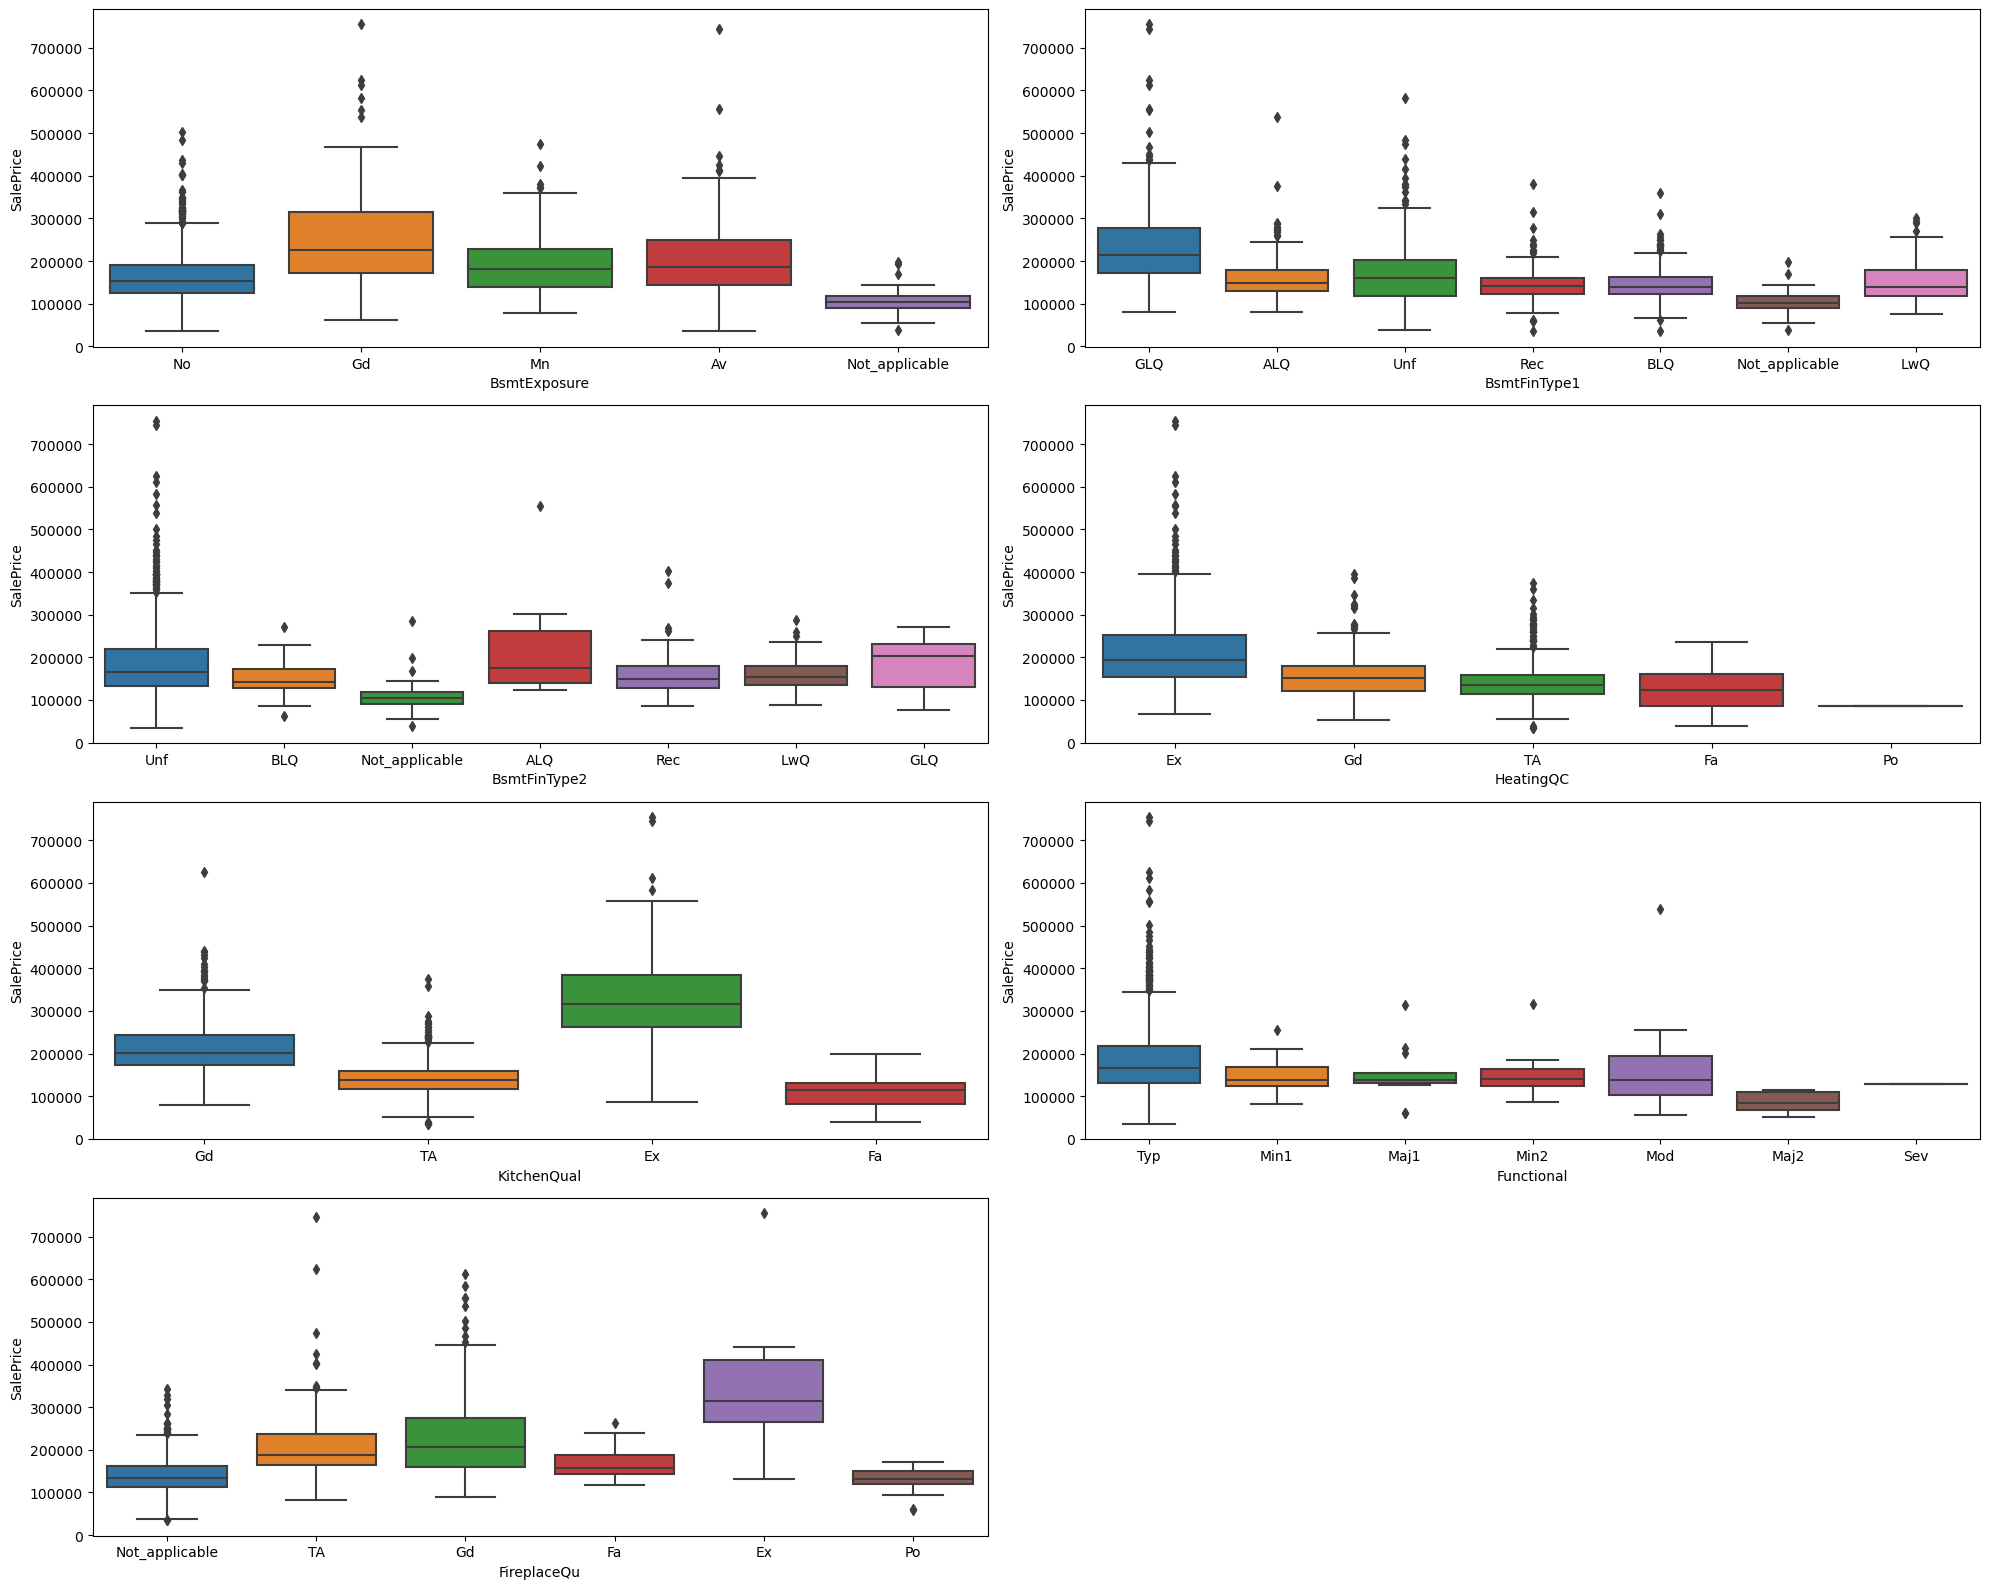

In [48]:
ext_features = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu']
generate_boxplot(ext_features)

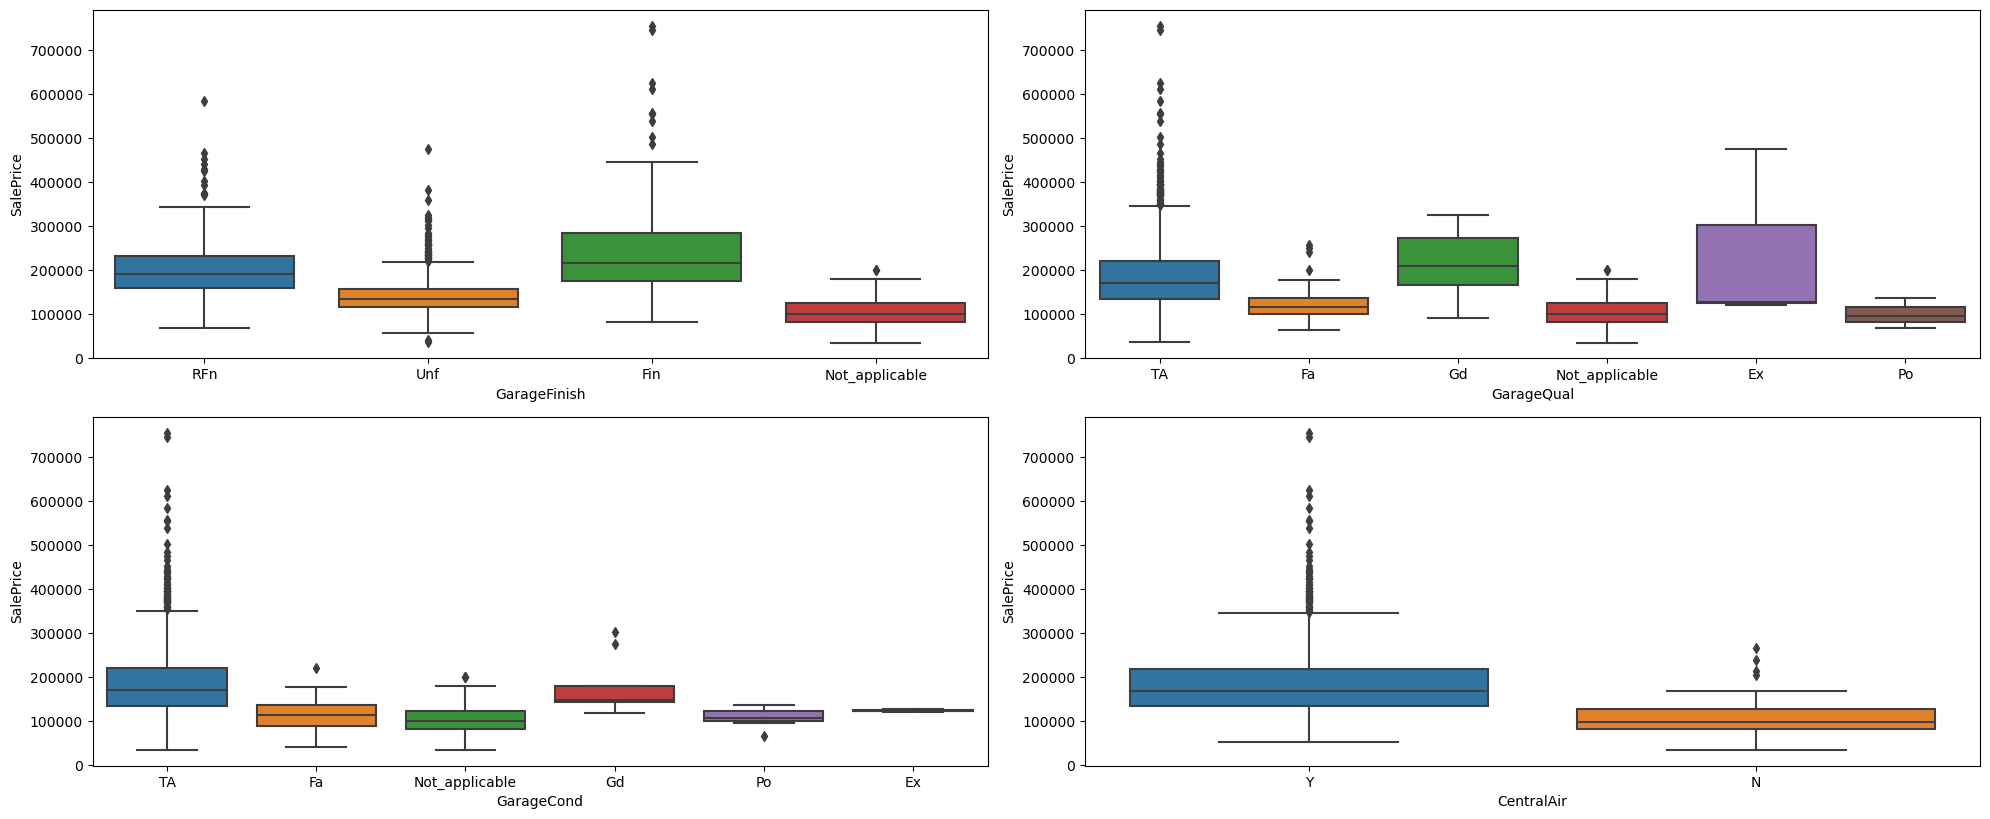

In [49]:
ext_features = ['GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']
generate_boxplot(ext_features)

# Encoding the Ordered Categorical columns

In [50]:
housing_df = df.copy()

In [51]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [52]:
housing_df[ordered_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
 18  CentralAir    1451 non-null   int64
dtypes: int64(19)
memory usage: 226.7

# Analyze the unordered features

In [53]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

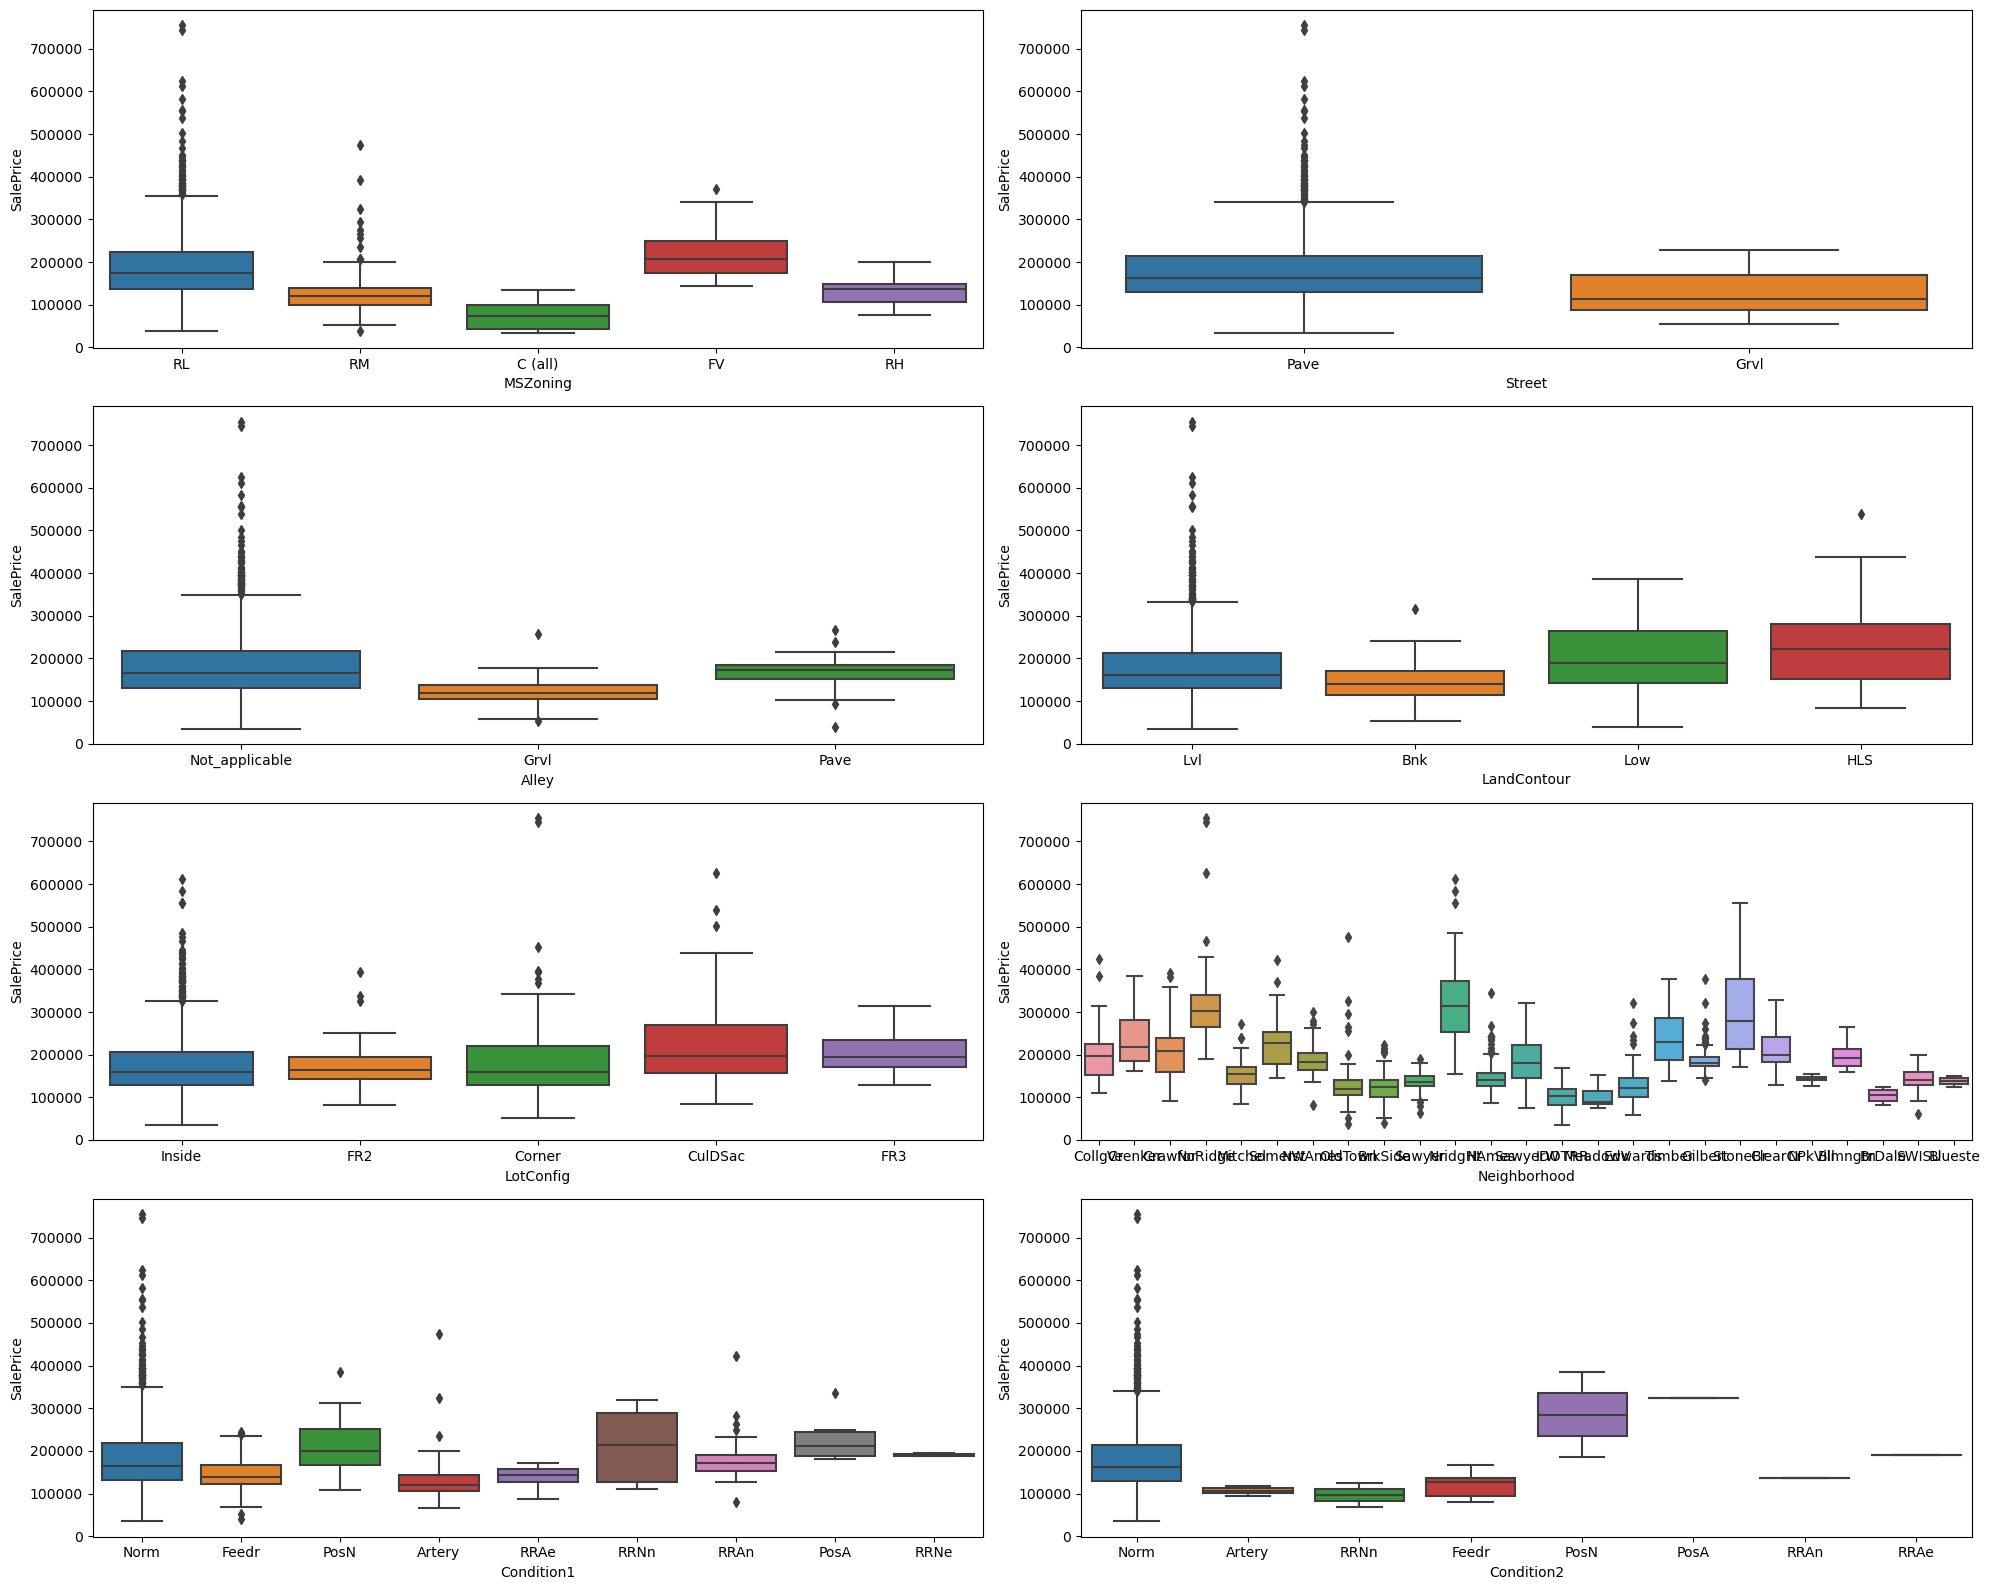

In [54]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2'])

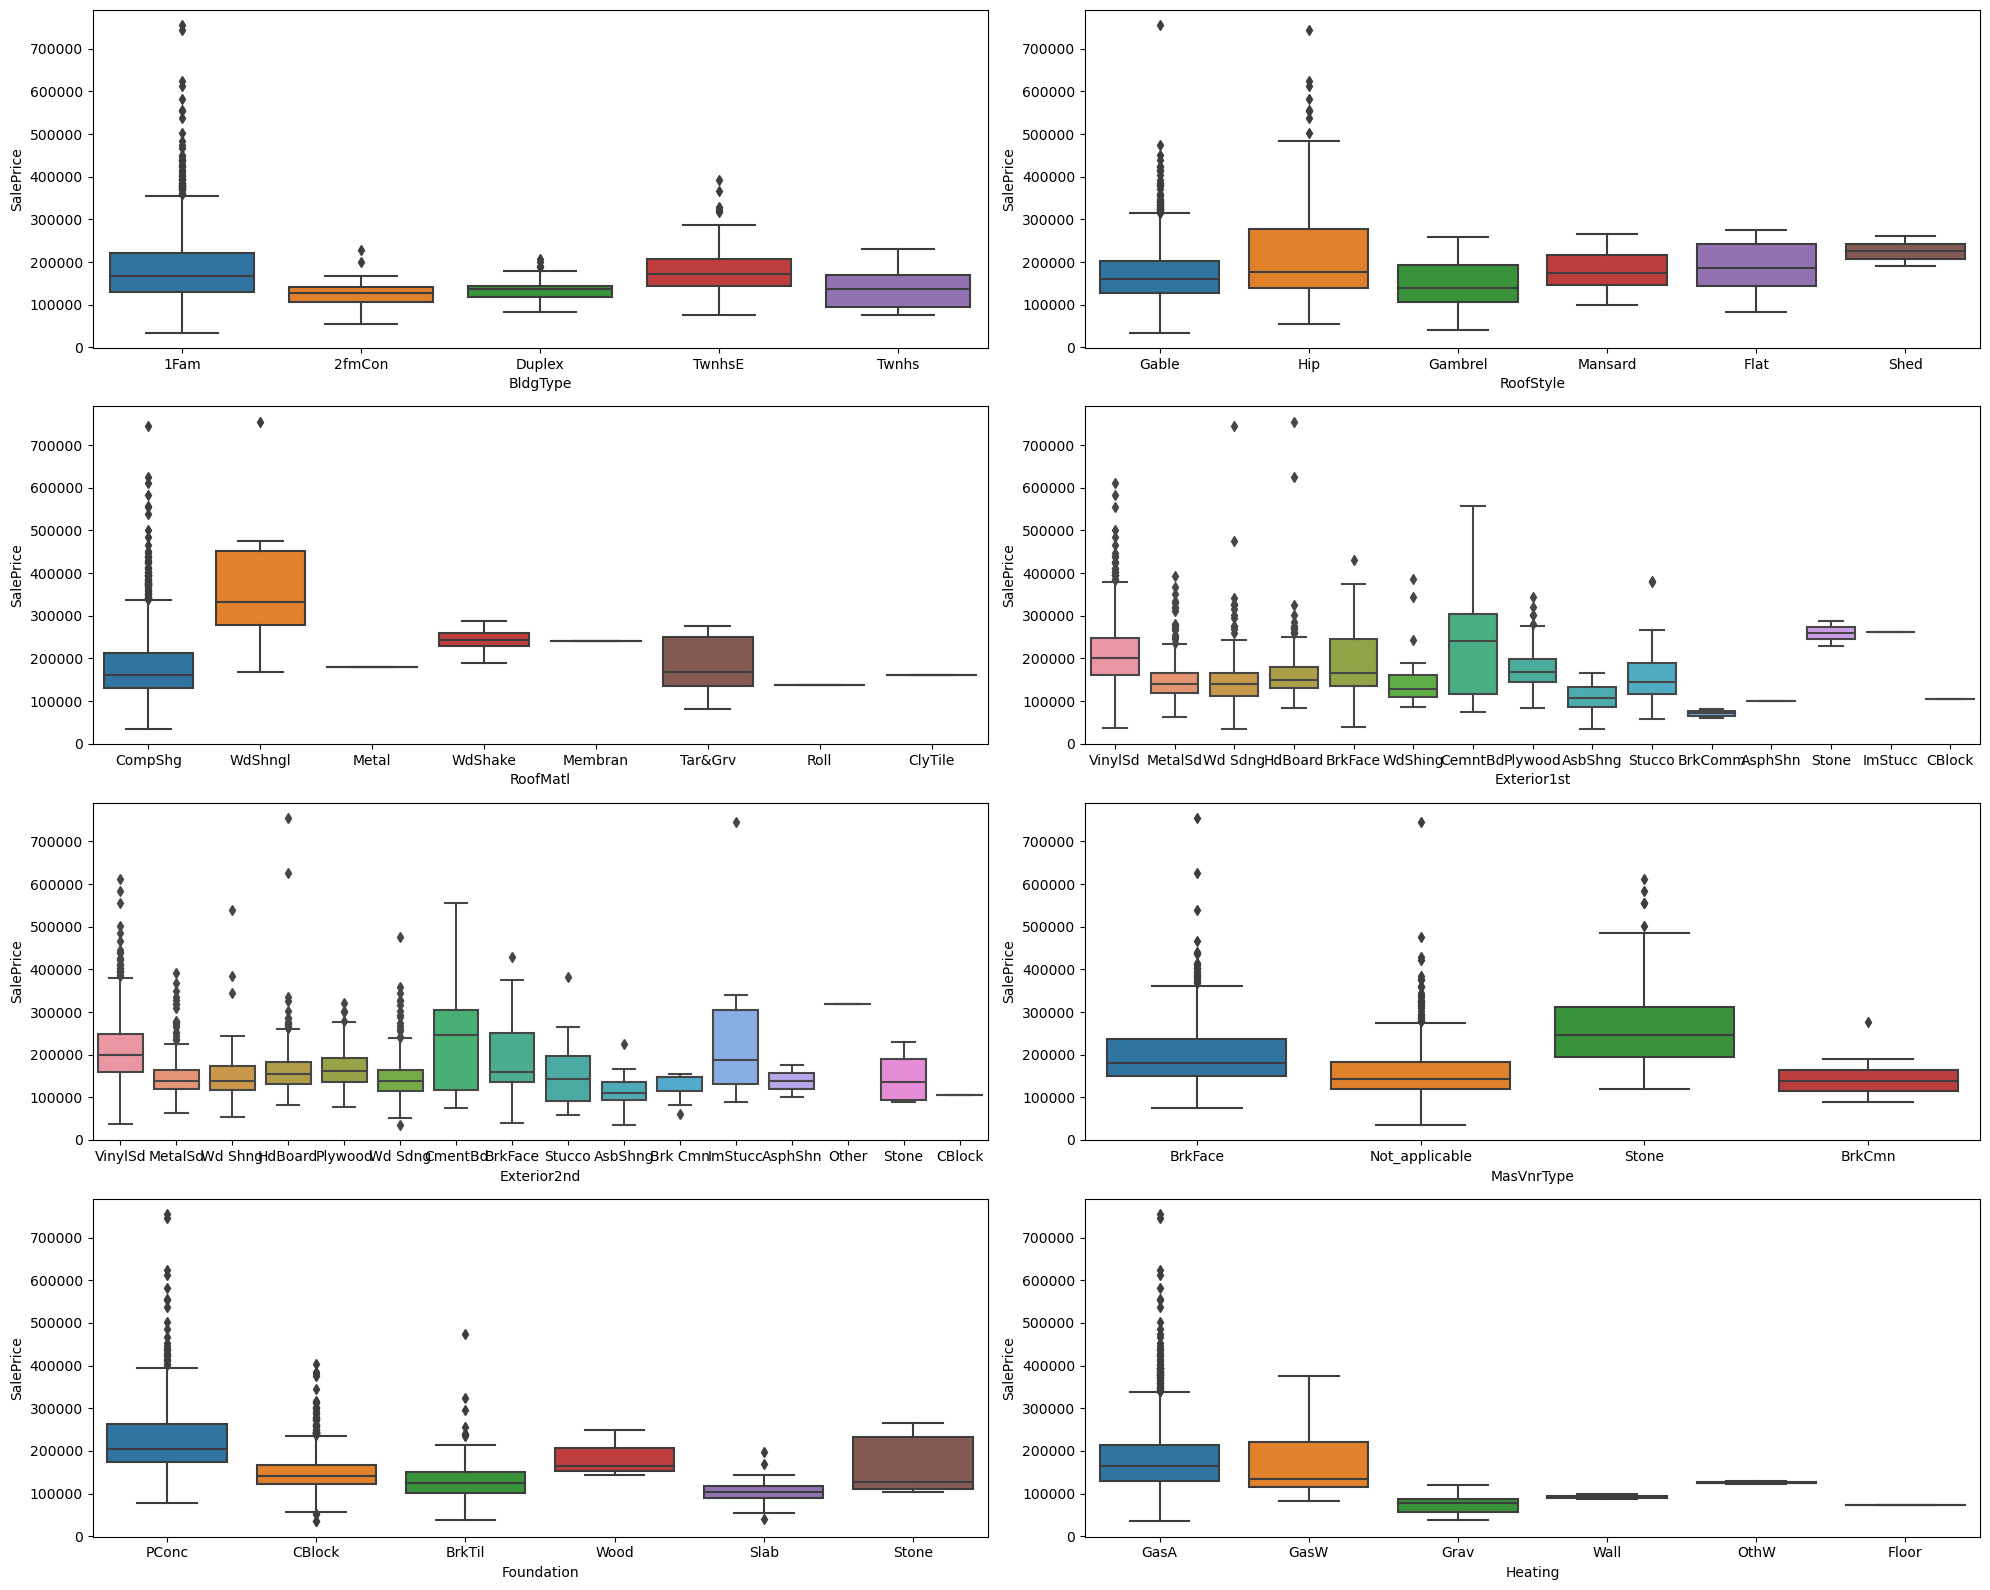

In [55]:
generate_boxplot(['BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating'])

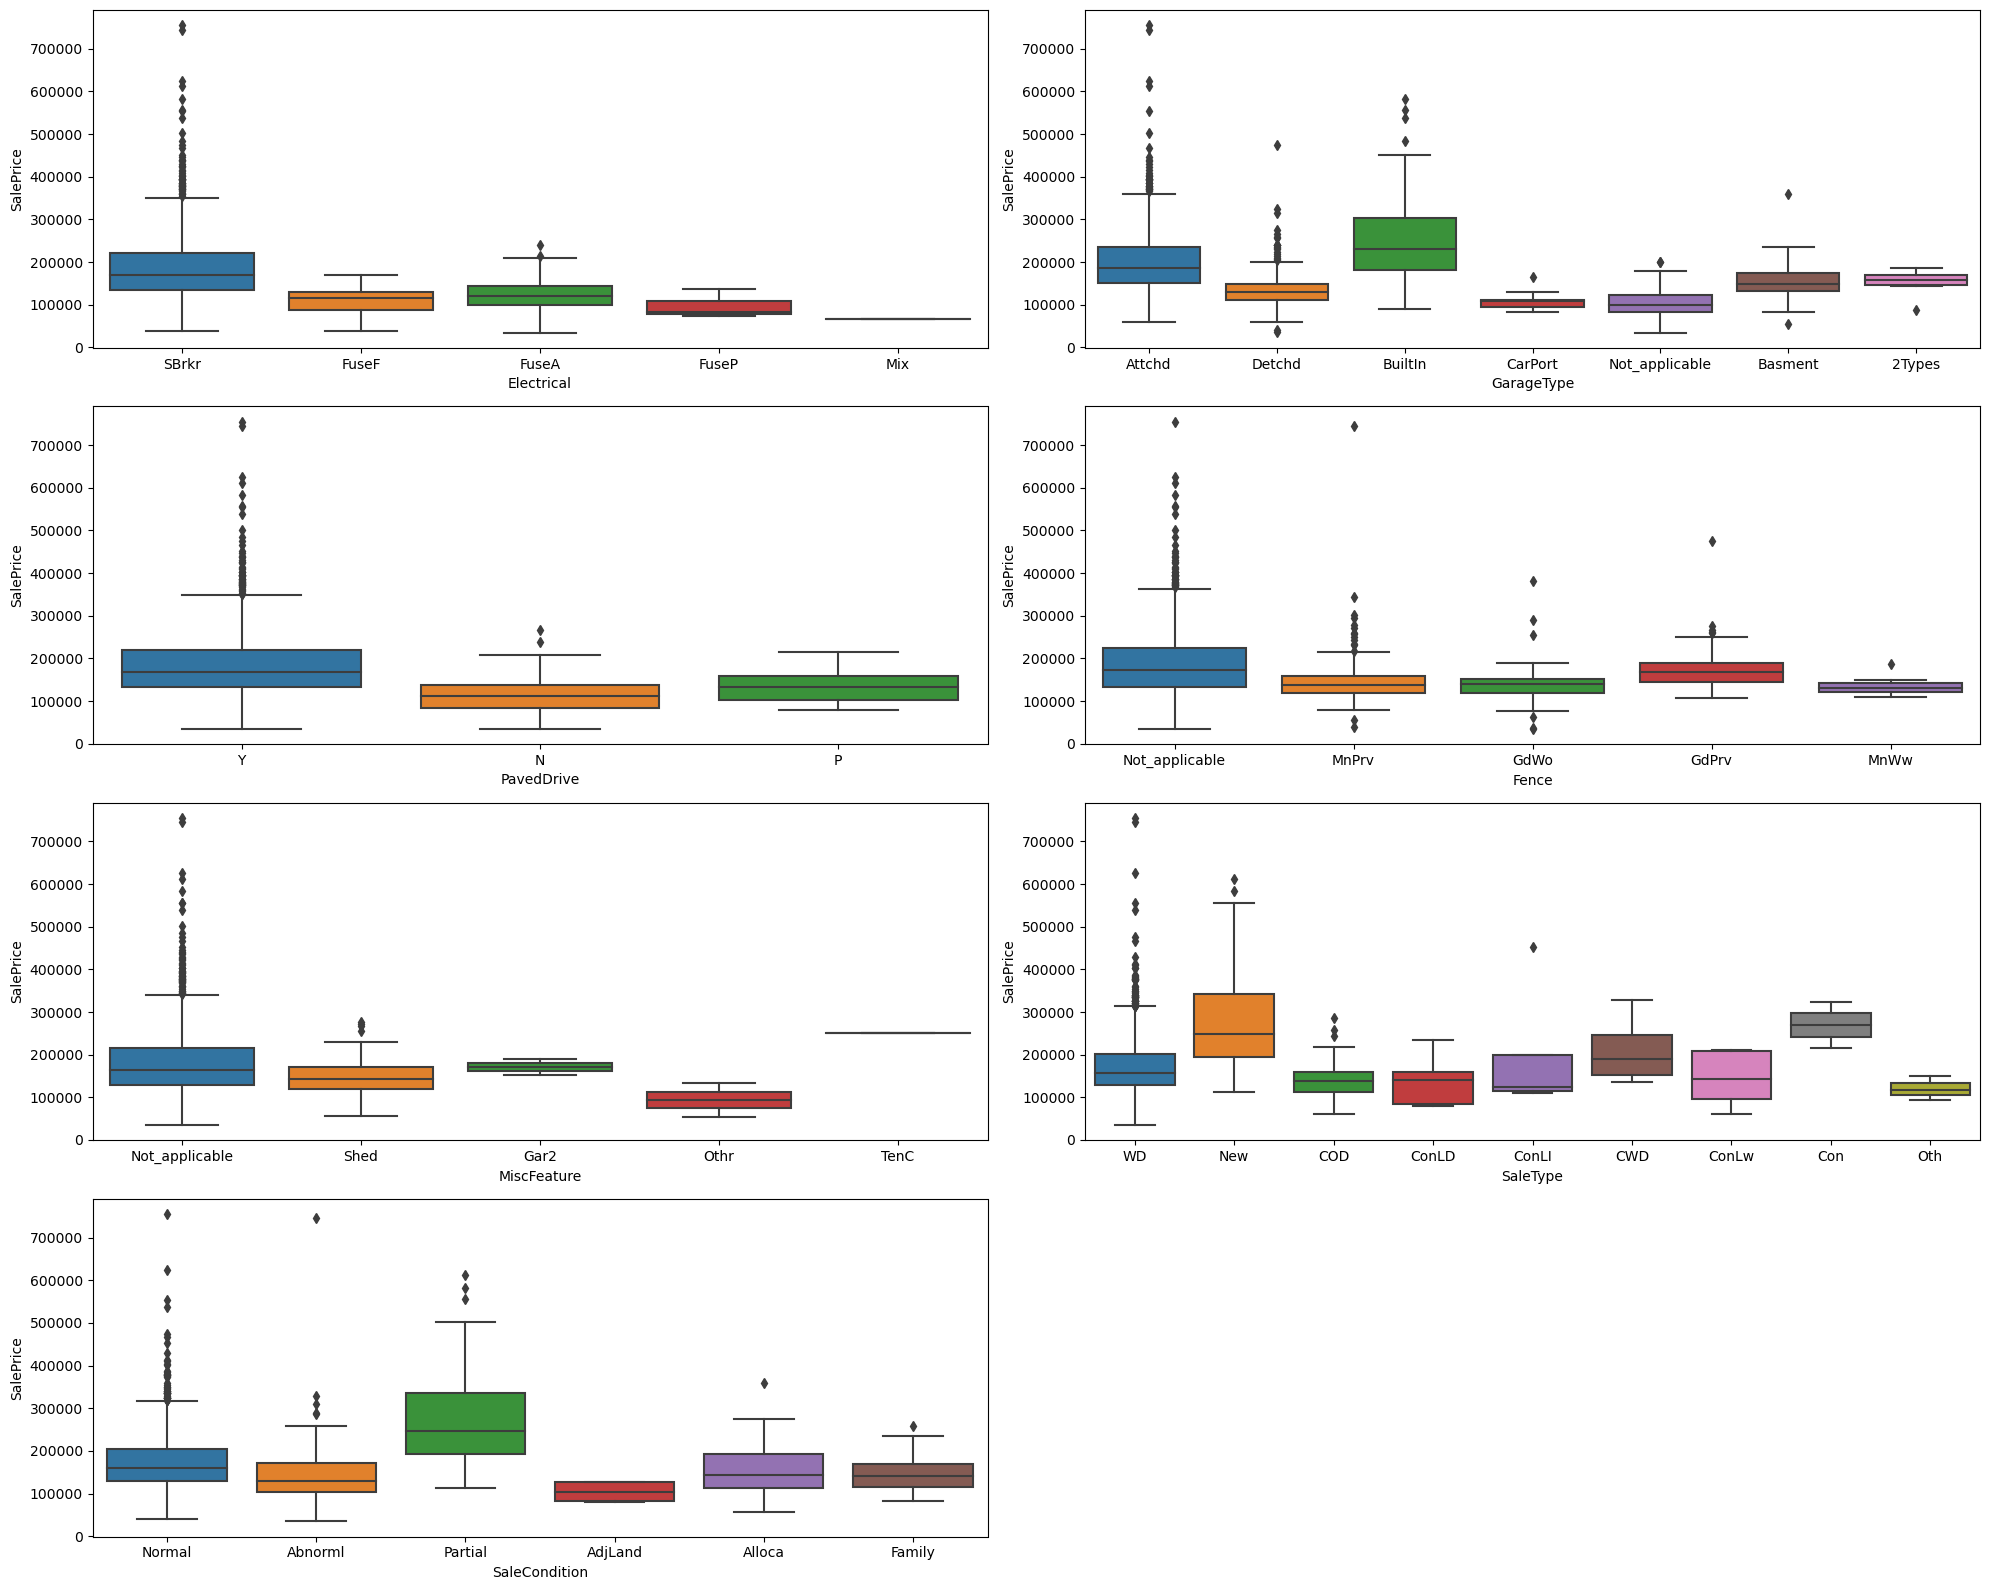

In [56]:
generate_boxplot(['Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'])

# One_Hot Encoding in unordered categorical variables

In [57]:
dummy_df = pd.get_dummies(housing_df[unordered_features],dtype=int, drop_first=True)

In [58]:
dummy_df.shape

(1451, 144)

In [59]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [60]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [61]:
housing_df.shape

(1451, 67)

In [62]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [63]:
housing_df.shape

(1451, 96)

# Splitting into test and train data

In [64]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0           3            7          5.0         21            21       196.0   
1           0            6          7.5         48            48         0.0   
2           3            7          5.0         23            22       162.0   
3           3            7          5.0        109            54         0.0   
4           3            8          5.0         24            24       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          2         4         3             1             6   
1          2          2         4         3             4             5   
2          3          2         4         3             2             6   
3          2          2         3         4             1             5   
4          3          2         4         3             3             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  HeatingQC  CentralAir  \
0       706.0             1           0      150.0          4           1   
1       978.0             1           0      284.0          4           1   
2       486.0             1           0      434.0          4           1   
3       216.0             1           0      540.0          3           1   
4       655.0             1           0      490.0          4           1   

   1stFlrSF  2ndFlrSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     856.0       854           1.0         2         1           3.0   
1    1262.0         0           0.0         2         0           3.0   
2     920.0       866           1.0         2         1           3.0   
3     961.0       756           1.0         1         0           3.0   
4    1145.0      1053           1.0         2         1           4.0   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            3             8           0         0.0            0   
1            2             6           0         1.0            3   
2            3             6           0         1.0            3   
3            3             7           0         1.0            4   
4            3             9           0         1.0            3   

   GarageFinish  GarageArea  GarageQual  GarageCond  WoodDeckSF  ...  \
0             2       548.0           3           3           0  ...   
1             2       460.0           3           3         298  ...   
2             2       608.0           3           3           0  ...   
3             1       642.0           3           3           0  ...   
4             2       836.0           3           3         192  ...   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Sawyer  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_Somerst  Condition1_Feedr  Condition1_Norm  Condition2_Norm  \
0                     0                 0                1                1   
1                     0                 1                0                1   
2                     0                 0                1                1   
3                     0                 0                1                1   
4                     0                 0                1                1   

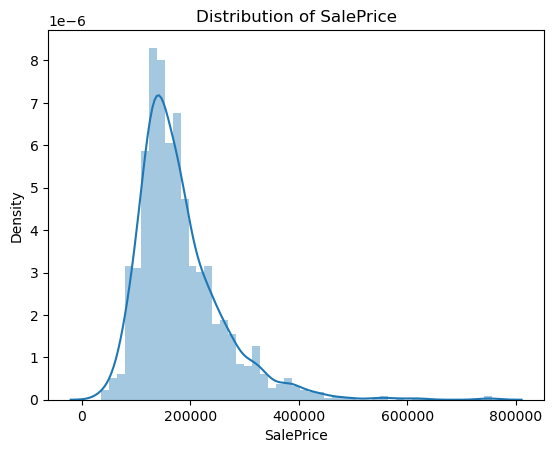

In [65]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

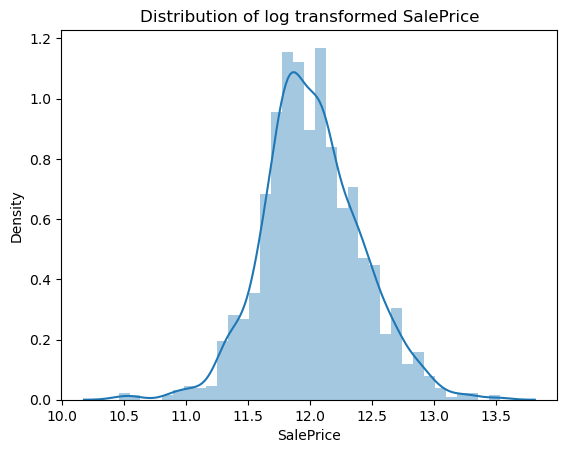

In [66]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [67]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 95)
(291, 95)
(1160,)
(291,)


In [70]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [71]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [72]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

# Feature Scaling

In [73]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [74]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [75]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [76]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
5      -0.137941     0.000000 -0.921280  0.747271   0.029374  -0.225421   
6      -0.936002    -0.558050  0.290659 -1.386037   0.029374  -0.225421   
7      -0.936002    -0.501621  0.014193  0.747271   0.029374  -0.225421   
8      -0.936002     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9      -0.936002     0.344804  1.394851  0.747271   0.029374  -0.225421   
10     -0.936002    -1.065905 -0.040098  0.747271   0.029374  -0.225421   
11      0.128080     0.006234 -0.545420  0.747271   0.029374  -0.225421   
12      0.527110    -0.50

In [87]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m,n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [88]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Not_applicable', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'He

In [89]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [90]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     267.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:54:11   Log-Likelihood:                 872.78
No. Observations:                1160   AIC:                            -1654.
Df Residuals:                    1114   BIC:                            -1421.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [91]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     242.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:54:30   Log-Likelihood:                 879.20
No. Observations:                1160   AIC:                            -1656.
Df Residuals:                    1109   BIC:                            -1399.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [92]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:55:13   Log-Likelihood:                 884.64
No. Observations:                1160   AIC:                            -1659.
Df Residuals:                    1105   BIC:                            -1381.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###### Comment: By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [93]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [94]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

# Ridge Regression

In [95]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 9.000000
ridge  Regression with  9.0
R2 score (train) :  0.9160724707718171
R2 score (test) :  0.8711702655512906
RMSE (train) :  0.11345220441394456
RMSE (test) :  0.15345476474131114


#### Comment: 
Ridge Regression model was able to achieve R2 score of 0.87 on test data i.e. 87% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1531 on test data, that means the prediction made by the model can off by 0.1531 unit.

# Lasso Regression

In [96]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9151025575749395
R2 score (test) :  0.8746082719909942
RMSE (train) :  0.11410587966076492
RMSE (test) :  0.1513933383455015


# Comparing Model Coefficients

In [97]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=9.0)  Lasso (alpha=0.0001)
MSSubClass                         -0.008686             -0.004754
LotFrontage                         0.007772              0.005526
LotArea                             0.032151              0.032423
LandSlope                           0.008475              0.008775
OverallQual                         0.079064              0.081540
OverallCond                         0.051376              0.051429
YearBuilt                          -0.038760             -0.040324
BsmtQual                            0.024329              0.025031
BsmtExposure                        0.009872              0.009076
BsmtFinSF1                          0.025766              0.026199
HeatingQC                           0.015098              0.015355
1stFlrSF                            0.122501              0.124388
2ndFlrSF                            0.104556              0.103963
BsmtFullBath                        0.020173              0.018211
FullBath                            0.010864              0.007914
HalfBath                            0.011907              0.010096
KitchenQual                         0.014655              0.014776
Functional                         -0.026104             -0.025164
Fireplaces                          0.022424              0.022217
GarageFinish                        0.010971              0.009979
GarageArea                          0.020926              0.021742
GarageQual                          0.016480              0.007435
MSZoning_RL                         0.026978              0.025671
Street_Pave                         0.009861              0.009264
LotConfig_CulDSac                   0.008344              0.007391
Neighborhood_Edwards               -0.014339             -0.012238
Neighborhood_NAmes                 -0.008930             -0.006147
Neighborhood_NWAmes                -0.007920             -0.005561
Neighborhood_NridgHt                0.015341              0.014102
Neighborhood_Somerst                0.024263              0.023134
Condition1_Feedr                    0.010512              0.008722
Condition1_Norm                     0.023136              0.021410
Condition2_Norm                     0.009434              0.008644
BldgType_TwnhsE                     0.008442              0.004691
RoofStyle_Gable                    -0.022699             -0.006705
RoofStyle_Hip                      -0.018435             -0.002383
Exterior1st_HdBoard                -0.017505             -0.007415
Exterior1st_Wd Sdng                -0.017608             -0.010178
Exterior2nd_HdBoard                 0.009922              0.000000
Exterior2nd_Wd Sdng                 0.012137              0.003928
MasVnrType_BrkFace                  0.013867              0.000000
MasVnrType_Not_applicable           0.013218              0.000000
MasVnrType_Stone                    0.011665              0.002233
Foundation_PConc                    0.017638              0.018623
GarageType_Attchd                   0.013578              0.008034
GarageType_Detchd                   0.016155              0.008712
GarageType_Not_applicable           0.012264              0.000000
PavedDrive_Y                        0.010720              0.009045
SaleCondition_Normal                0.029106              0.028214
SaleCondition_Partial               0.034157              0.033315

In [98]:

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[296053 220828 137428 113525 146504]


# Final Model

In [102]:
#### Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [103]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

Lasso (alpha=0.0001)
1stFlrSF                               0.124388
2ndFlrSF                               0.103963
OverallQual                            0.081540
OverallCond                            0.051429
SaleCondition_Partial                  0.033315
LotArea                                0.032423
SaleCondition_Normal                   0.028214
BsmtFinSF1                             0.026199
MSZoning_RL                            0.025671
BsmtQual                               0.025031
Neighborhood_Somerst                   0.023134
Fireplaces                             0.022217
GarageArea                             0.021742
Condition1_Norm                        0.021410
Foundation_PConc                       0.018623
BsmtFullBath                           0.018211
HeatingQC                              0.015355
KitchenQual                            0.014776
Neighborhood_NridgHt                   0.014102
HalfBath                               0.010096
GarageFinish                           0.009979
Street_Pave                            0.009264
BsmtExposure                           0.009076
PavedDrive_Y                           0.009045
LandSlope                              0.008775
Condition1_Feedr                       0.008722
GarageType_Detchd                      0.008712
Condition2_Norm                        0.008644
GarageType_Attchd                      0.008034
FullBath                               0.007914
GarageQual                             0.007435
LotConfig_CulDSac                      0.007391
LotFrontage                            0.005526
BldgType_TwnhsE                        0.004691
Exterior2nd_Wd Sdng                    0.003928
MasVnrType_Stone                       0.002233
GarageType_Not_applicable              0.000000
MasVnrType_Not_applicable              0.000000
Exterior2nd_HdBoard                    0.000000
MasVnrType_BrkFace                     0.000000
RoofStyle_Hip                         -0.002383
MSSubClass                            -0.004754
Neighborhood_NWAmes                   -0.005561
Neighborhood_NAmes                    -0.006147
RoofStyle_Gable                       -0.006705
Exterior1st_HdBoard                   -0.007415
Exterior1st_Wd Sdng                   -0.010178
Neighborhood_Edwards                  -0.012238
Functional                            -0.025164
YearBuilt                             -0.040324

In [105]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:45]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal',
       'BsmtFinSF1', 'MSZoning_RL', 'BsmtQual', 'Neighborhood_Somerst',
       'Fireplaces', 'GarageArea', 'Condition1_Norm', 'Foundation_PConc',
       'BsmtFullBath', 'HeatingQC', 'KitchenQual', 'Neighborhood_NridgHt',
       'HalfBath', 'GarageFinish', 'Street_Pave', 'BsmtExposure',
       'PavedDrive_Y', 'LandSlope', 'Condition1_Feedr', 'GarageType_Detchd',
       'Condition2_Norm', 'GarageType_Attchd', 'FullBath', 'GarageQual',
       'LotConfig_CulDSac', 'LotFrontage', 'BldgType_TwnhsE',
       'Exterior2nd_Wd Sdng', 'MasVnrType_Stone', 'GarageType_Not_applicable',
       'MasVnrType_Not_applicable', 'Exterior2nd_HdBoard',
       'MasVnrType_BrkFace', 'RoofStyle_Hip', 'MSSubClass',
       'Neighborhood_NWAmes', 'Neighborhood_NAmes', 'RoofStyle_Gable'],
      dtype='object')

# Summary:-


###### First the housing data is read and analyzed dividing the features into numerical and categorical types.

###### SalePrice is the target column here.

###### All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.

###### New features are extracted, redundant features dropped and categorical features are encoded accordingly.

###### Then the data in split into train and test data and feature scaling is performed.

###### Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

###### Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

###### Top 50 features are selected through RFE and adjusted R-square. 50 features : ['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']

###### Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.

###### Model evaluation is done with R2 score and Root Mean Square Error.

###### Lasso Regression is chosen as final model for having slightly better R-square value on test data.

###### Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']

###### Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.

###### Predicted value of SalePrice is tranformed into its original scale by performing antilog.